# Capstone Project - Walmart Sales Forcasting
## Submited by - Vijay B G - vijay.sudhaganesh@gamil.com

## 1. You are provided with the weekly sales data for their various outlets. 

In [1]:
# Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various
# insights that can give them a clear perspective on the following:

In [2]:
#importing the Libearys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the Walmart Dataset

wal = pd.read_csv("./Walmart.csv")

In [4]:
wal.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [5]:
#size of the Dataset

wal.shape

(6435, 8)

In [6]:
#Total stores given in the Dataset

wal['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [7]:
#Checking the information about the dataset

wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
#checking the null values present in the dataset

wal.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
#checking the the statistical data about dataset

wal.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [10]:
#seeing the number of store in the dataset

store_numbers=list(wal['Store'].unique())
len(store_numbers)

45

In [11]:
# we are seperating the data in stores wise. Different store data is created. 

for i in range(1,len(store_numbers)+1):
    globals()[f'Store{i}'] = wal[wal['Store'] == i]

In [12]:
#for example, simply type 'Store'end with the store number (1 to 45), it show's the entire data about the store.

Store30

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4147     30  05-02-2010     465108.52             0        39.05       2.572   
4148     30  12-02-2010     497374.57             1        37.77       2.548   
4149     30  19-02-2010     463513.26             0        39.75       2.514   
4150     30  26-02-2010     472330.71             0        45.31       2.561   
4151     30  05-03-2010     472591.07             0        48.61       2.625   
...     ...         ...           ...           ...          ...         ...   
4285     30  28-09-2012     425410.04             0        80.38       3.666   
4286     30  05-10-2012     446751.45             0        70.28       3.617   
4287     30  12-10-2012     434593.26             0        61.53       3.601   
4288     30  19-10-2012     437537.29             0        68.52       3.594   
4289     30  26-10-2012     439424.50             0        70.50       3.506   

             CPI  Unemployment  
4147  210.752605         8.324  
4148  210.897994         8.324  
4149  210.945160         8.324  
4150  210.975957         8.324  
4151  211.006754         8.324  
...          ...           ...  
4285  222.616433         6.565  
4286  222.815930         6.170  
4287  223.015426         6.170  
4288  223.059808         6.170  
4289  223.078337         6.170  

[143 rows x 8 columns]

### Information about the dataset by ploting the columns.

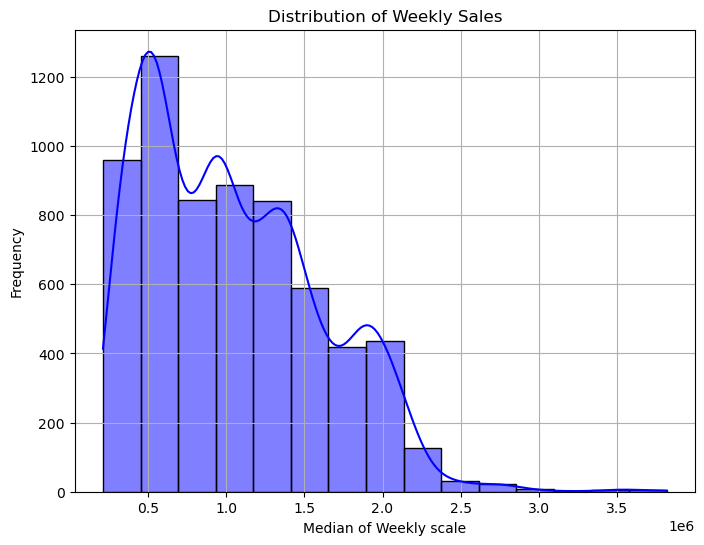

In [13]:
#Distribution of the Weekly Sales

plt.figure(figsize =(8,6))
sns.histplot(data = wal, x = 'Weekly_Sales',kde = True,bins =15, color ='b')
plt.xlabel('Median of Weekly scale')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.grid(True)
plt.show()

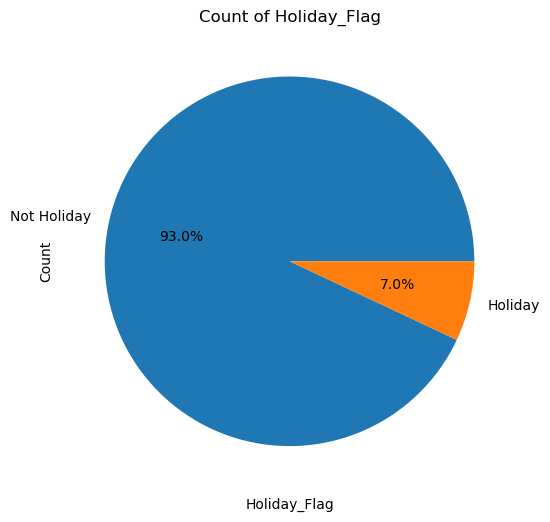

In [14]:
#Count of the Holiday Flag

plt.figure(figsize =(6,6))
plt.pie(wal['Holiday_Flag'].value_counts(), autopct="%1.1f%%", labels=['Not Holiday','Holiday'])
plt.xlabel('Holiday_Flag')
plt.ylabel('Count')
plt.title('Count of Holiday_Flag')
plt.show()

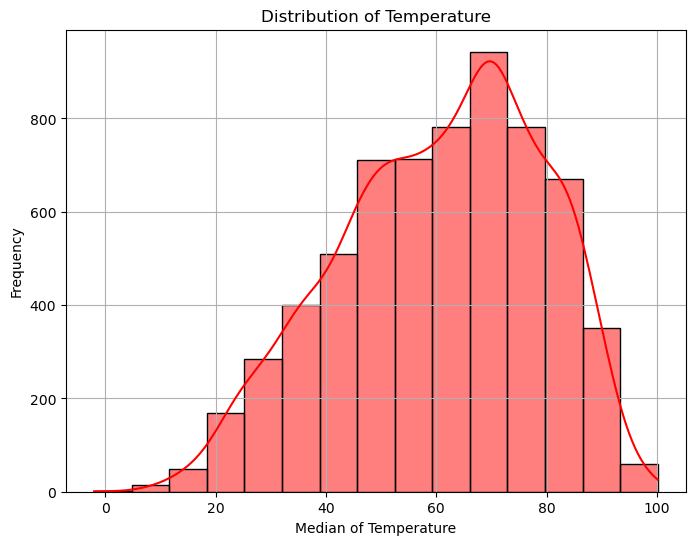

In [15]:
#Distribution of the Temperature

plt.figure(figsize =(8,6))
sns.histplot(data = wal, x = 'Temperature',kde = True,bins =15, color ='r')
plt.xlabel('Median of Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.grid(True)
plt.show()

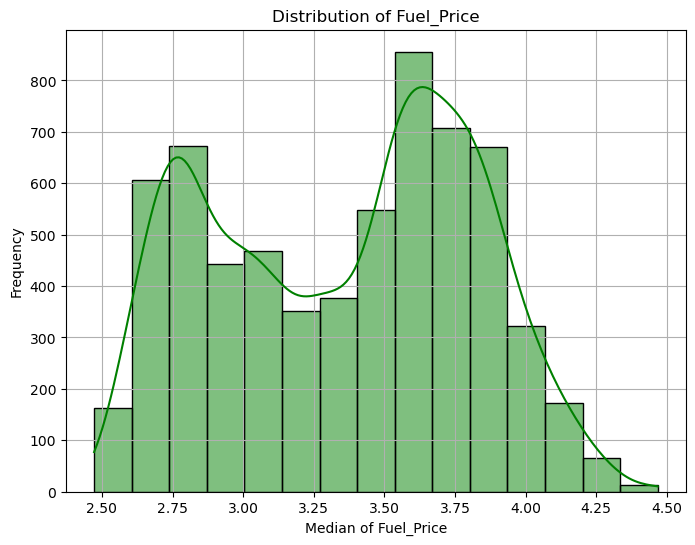

In [16]:
#Distribution of the Fuel_Price

plt.figure(figsize =(8,6))
sns.histplot(data = wal, x = 'Fuel_Price',kde = True,bins =15, color ='g')
plt.xlabel('Median of Fuel_Price')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel_Price')
plt.grid(True)
plt.show()

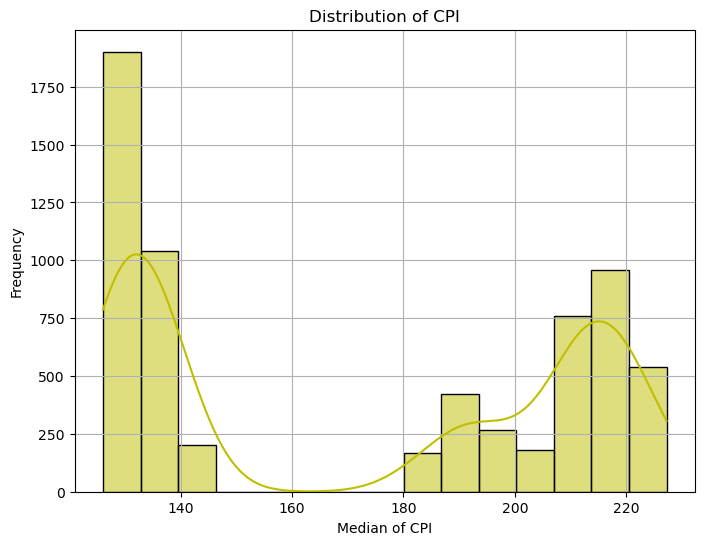

In [17]:
#Distribution of the CPI

plt.figure(figsize =(8,6))
sns.histplot(data = wal, x = 'CPI',kde = True,bins =15, color ='y')
plt.xlabel('Median of CPI')
plt.ylabel('Frequency')
plt.title('Distribution of CPI')
plt.grid(True)
plt.show()

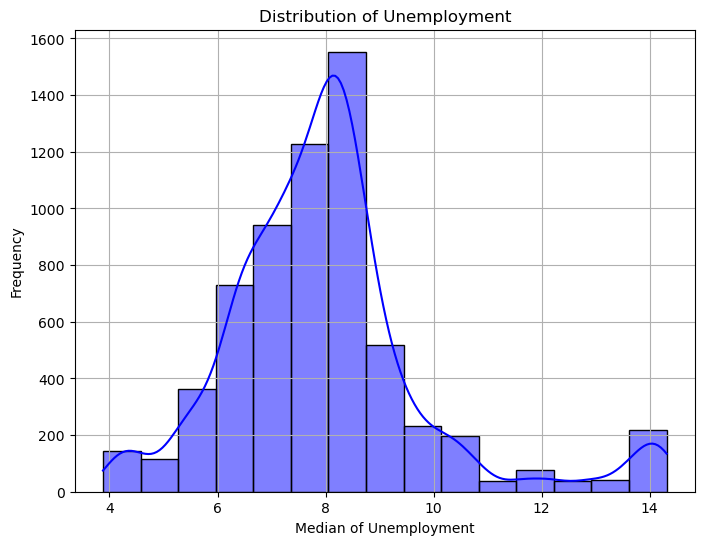

In [18]:
#Distribution of the Unemployment

plt.figure(figsize =(8,6))
sns.histplot(data = wal, x = 'Unemployment',kde = True,bins =15, color ='b')
plt.xlabel('Median of Unemployment')
plt.ylabel('Frequency')
plt.title('Distribution of Unemployment')
plt.grid(True)
plt.show()

### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [19]:
#Let just pick those who have less Weekly Sales. As it will be too lenghty to analyze 45 stores data.
#We will pick those stores for which weekly sales is less than 15 percentile.

In [20]:
#By using the Quantile to find least weeekly sales data from the dataset.

a1 = round(wal['Weekly_Sales'].quantile(0.15),1)
a1

452231.6

In [21]:
less_sales = wal[wal['Weekly_Sales'] < a1]['Store'].unique()
less_sales

array([ 3,  5,  7, 16, 29, 30, 33, 36, 37, 38, 42, 44], dtype=int64)

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

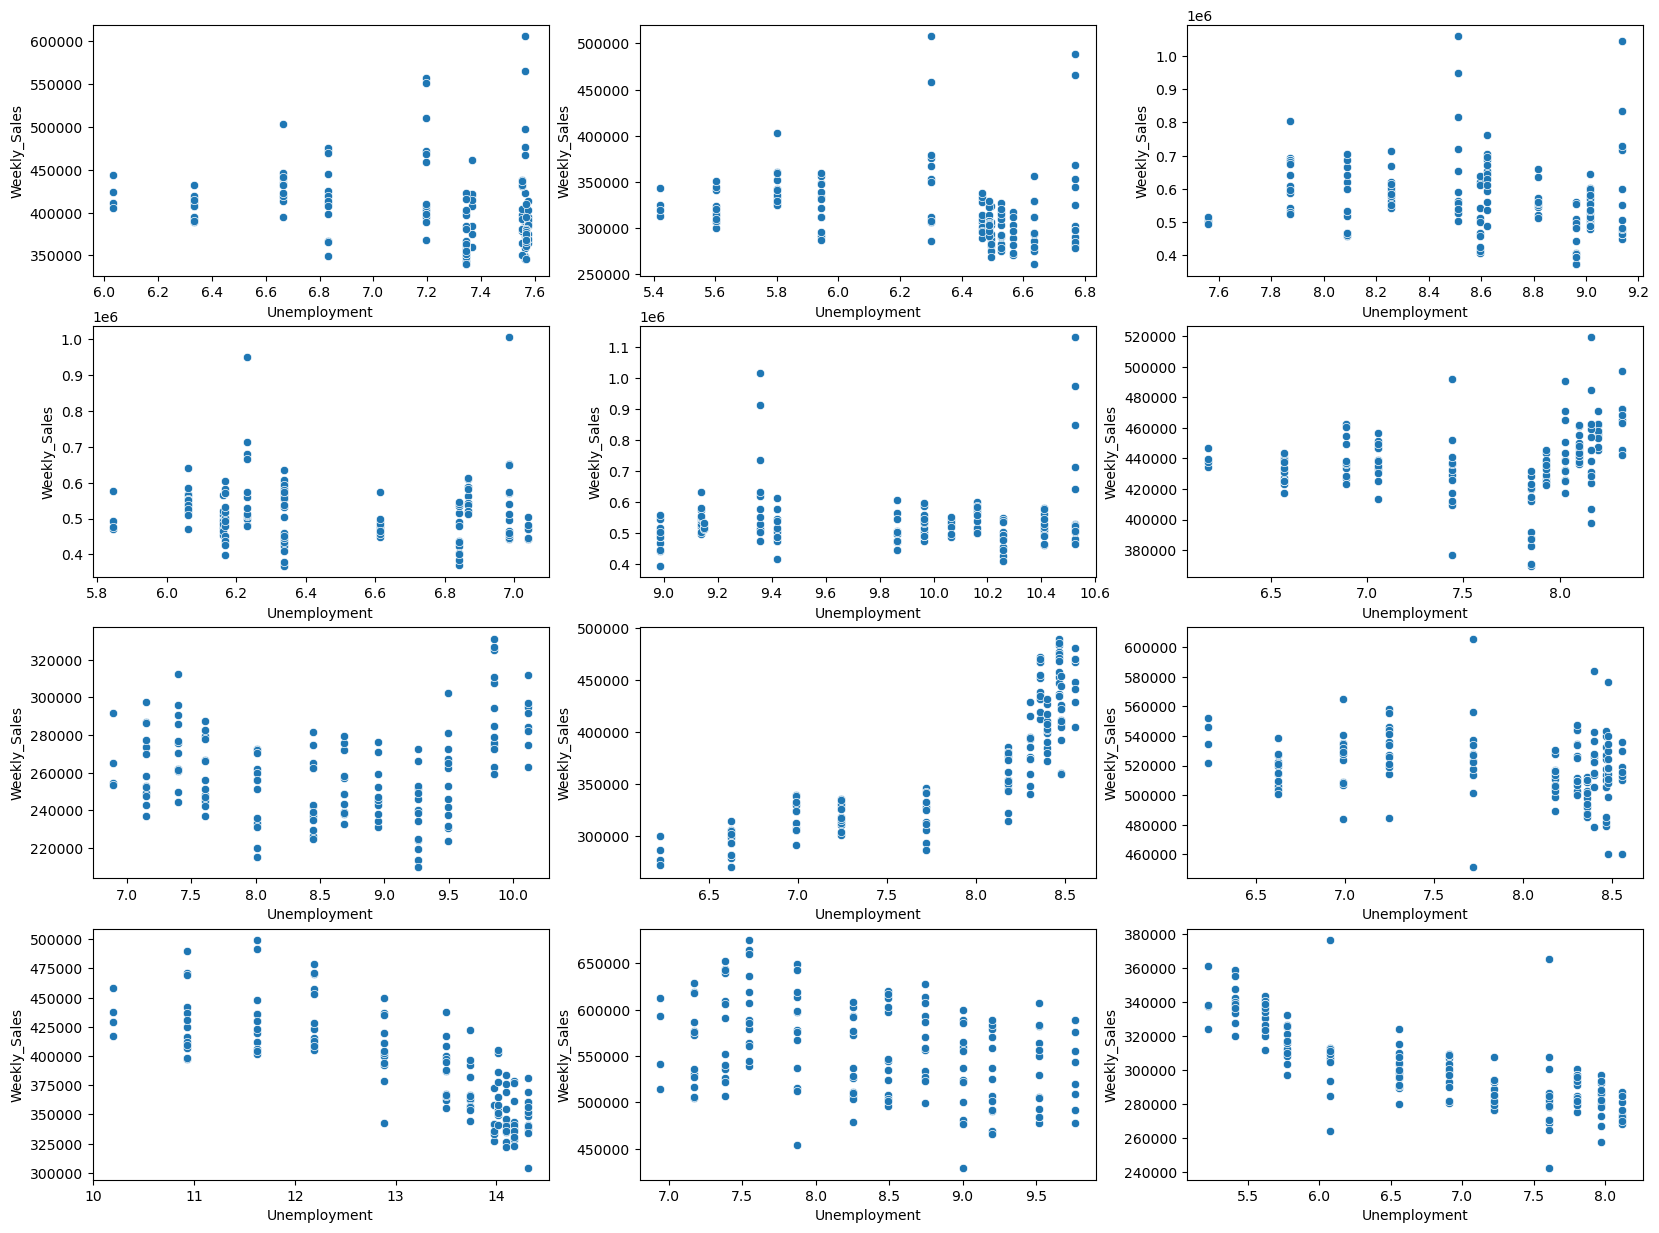

In [22]:
#For the above obtain less sales stores we plot the scatter plot

plt.figure(figsize = (20,15))

plt.subplot(4,3,1)
sns.scatterplot(data = Store3, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,2)
sns.scatterplot(data = Store5, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,3)
sns.scatterplot(data = Store7, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,4)
sns.scatterplot(data = Store16, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,5)
sns.scatterplot(data = Store29, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,6)
sns.scatterplot(data = Store30, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,7)
sns.scatterplot(data = Store33, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,8)
sns.scatterplot(data = Store36, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,9)
sns.scatterplot(data = Store37, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,10)
sns.scatterplot(data = Store38, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,11)
sns.scatterplot(data = Store42, x = "Unemployment", y = "Weekly_Sales" )

plt.subplot(4,3,12)
sns.scatterplot(data = Store44, x = "Unemployment", y = "Weekly_Sales" )

By seeing the above graph, the two store weelkly sales reduce the unemployement increase those are 38 and 44.
In some of the store the unemployement increase the weelkly sales also increase those are 5, 30 and 36.
Remaining graph are seems like average weelkly sales in the period, no unemployement affected.

### b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [23]:
#Converting the Date column dtype to Date-Time.

wal['Date'] = pd.to_datetime(wal['Date'])
wal['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


C:\Users\Vijay\AppData\Local\Temp\ipykernel_15060\4047106650.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  wal['Date'] = pd.to_datetime(wal['Date'])


In [24]:
#Selecting the required column and store into new variable

sales_date = wal[['Date','Weekly_Sales']]
sales_date.set_index('Date',inplace= True)
sales_date

Weekly_Sales
Date                    
2010-05-02    1643690.90
2010-12-02    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-05-03    1554806.68
...                  ...
2012-09-28     713173.95
2012-05-10     733455.07
2012-12-10     734464.36
2012-10-19     718125.53
2012-10-26     760281.43

[6435 rows x 1 columns]

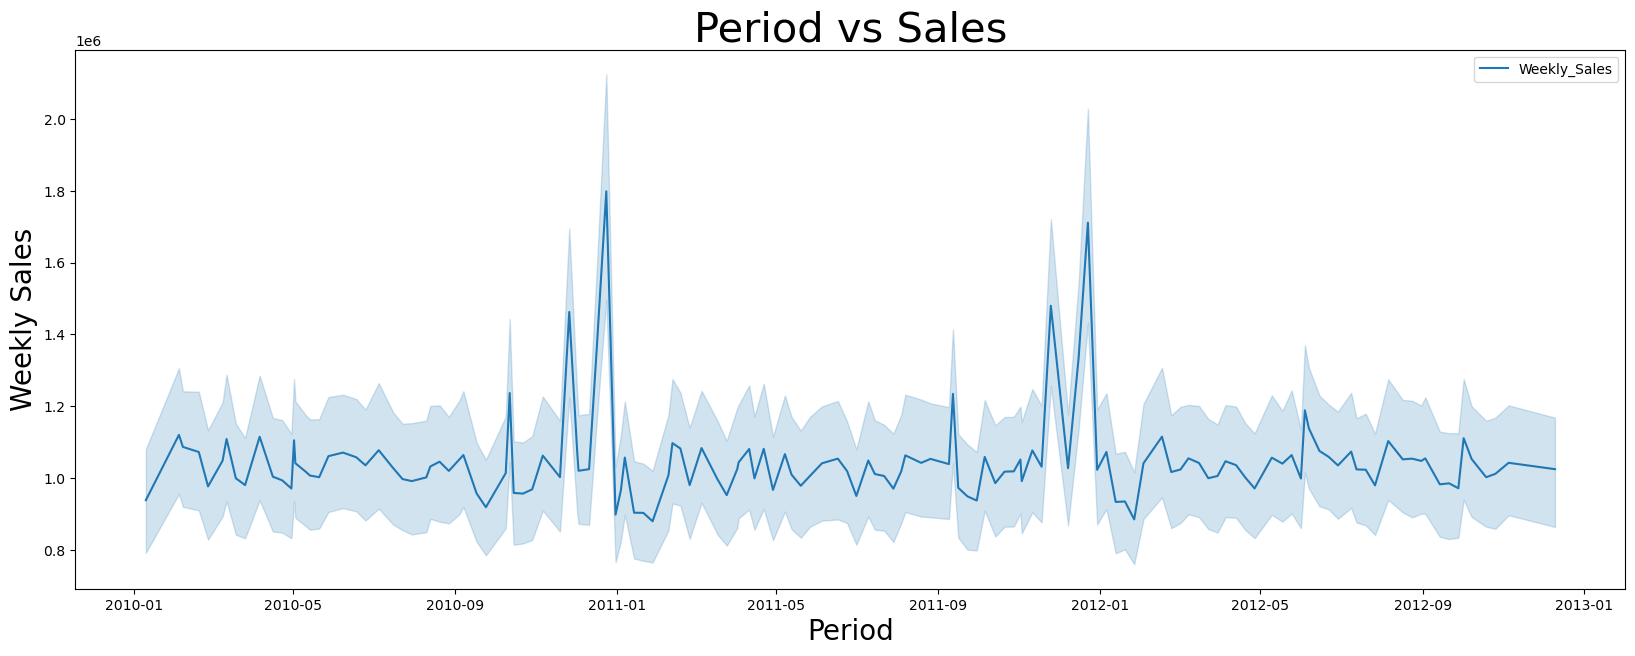

In [25]:
#ploting the line plot for Period vs Sales.

plt.figure(figsize = (20,7))
sns.lineplot(data = sales_date)

plt.xlabel('Period',fontsize = 20)
plt.ylabel('Weekly Sales', fontsize = 20)
plt.title('Period vs Sales', fontsize = 30)
plt.show()

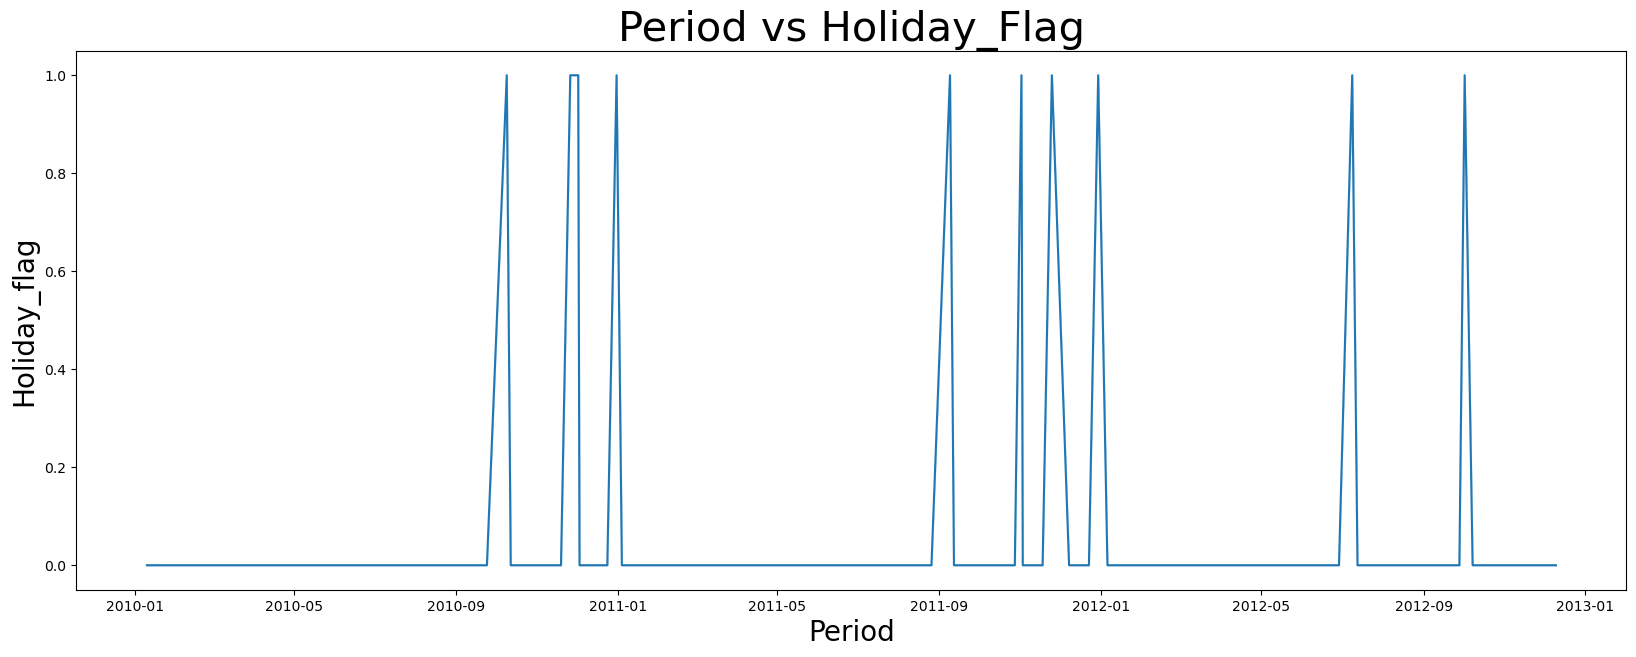

In [26]:
#ploting the line plot for Period vs Sales

plt.figure(figsize = (20,7))
sns.lineplot(data = wal, x = 'Date', y ='Holiday_Flag')

plt.xlabel('Period',fontsize = 20)
plt.ylabel('Holiday_flag', fontsize = 20)
plt.title('Period vs Holiday_Flag', fontsize = 30)
plt.show()

We can clearly see there is a seasonal trend in weekly sales. 
Whole year sales is average. But at the end of the year there is the holiday season begins

So, the spike in the sales overlaps with the holiday season.

AS we known that Walmart famous in weasten country, they celebrate holidays in season of christmans and new year, so the sudden spike in the sales at the end of the year and sales also increase.

## c. Does temperature affect the weekly sales in any manner?

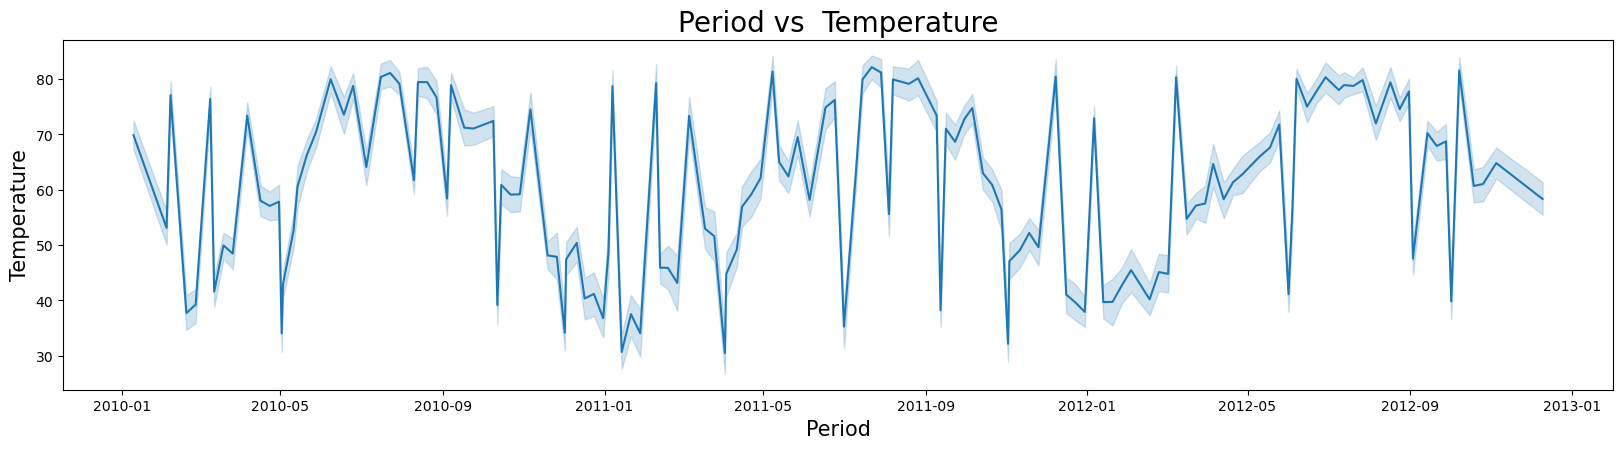

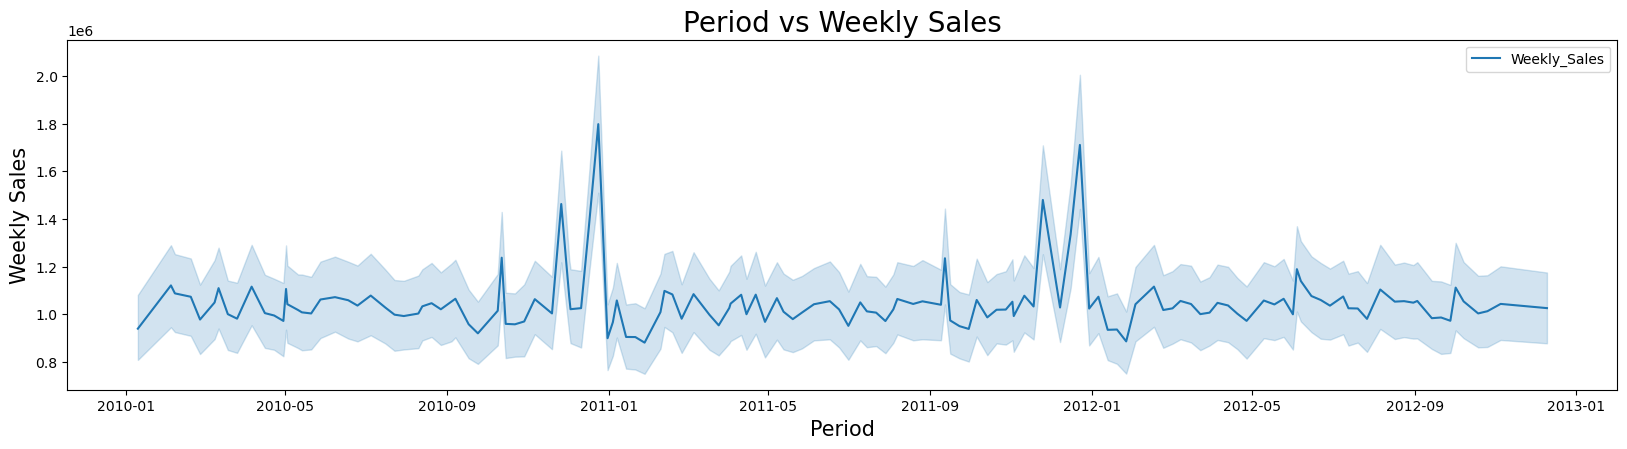

In [27]:
#ploting the line plot for 'Period vs  Temperature and Period vs Sales to compare the Status.

plt.figure(figsize = (20,10))

plt.subplot(2,1,1)
sns.lineplot(data = wal, x = 'Date', y ='Temperature')
plt.xlabel('Period',fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.title('Period vs  Temperature', fontsize = 20)

plt.figure(figsize = (20,10))
plt.subplot(2,1,2)
sns.lineplot(data = sales_date)
plt.xlabel('Period',fontsize = 15)
plt.ylabel('Weekly Sales', fontsize = 15)
plt.title('Period vs Weekly Sales', fontsize = 20)

plt.show()

In weasten countries the Holiday season are marked with winters and snow, that increases the needed clothing and stuff.
Other than this there is no such clear trend of shopping related with temprature.

### d. How is the Consumer Price index affecting the weekly sales of various stores?

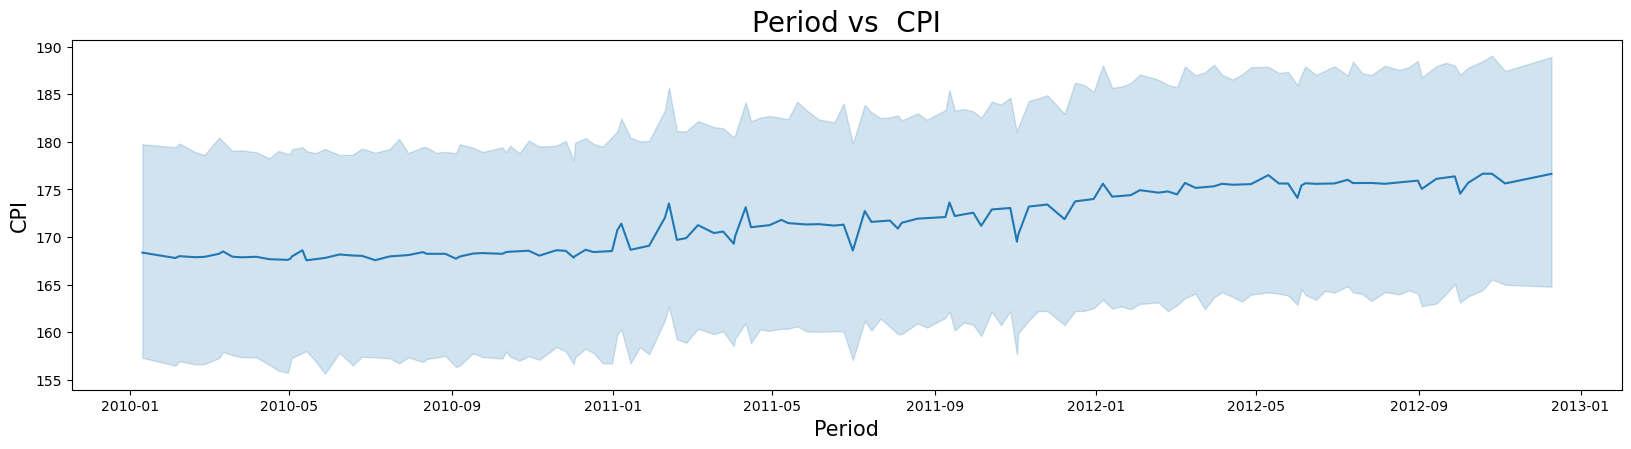

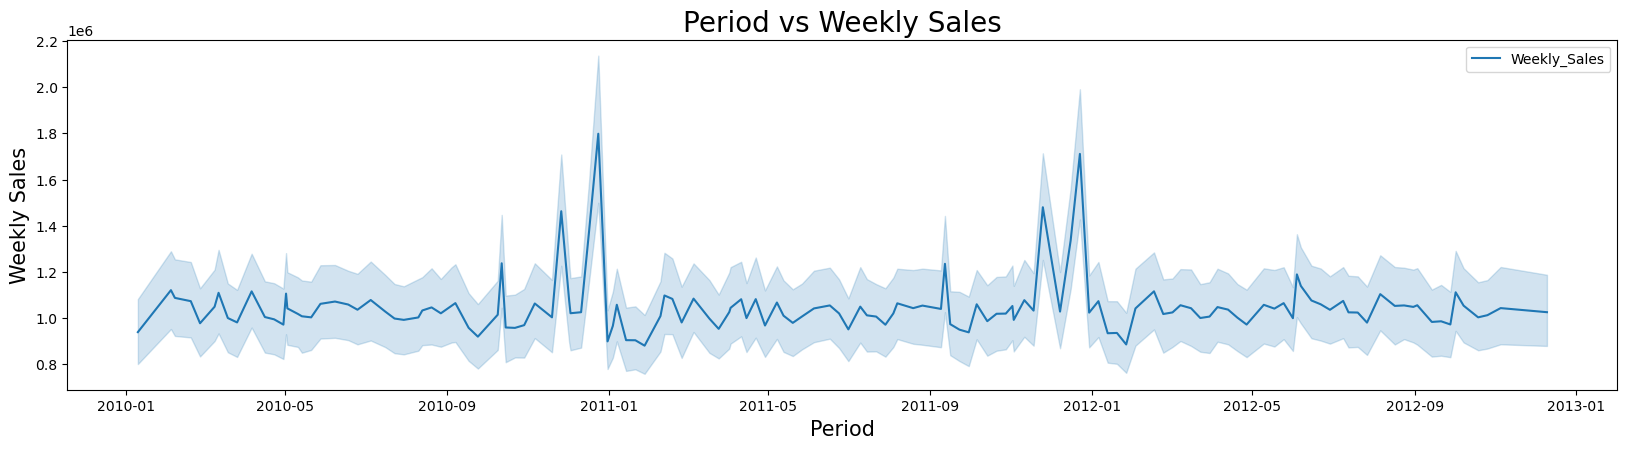

In [28]:
#ploting the line plot for Period vs Temperature and Period vs Sales to compare the Status.

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
sns.lineplot(data = wal, x = 'Date', y ='CPI')
plt.xlabel('Period',fontsize = 15)
plt.ylabel('CPI', fontsize = 15)
plt.title('Period vs  CPI', fontsize = 20)

plt.figure(figsize = (20,10))
plt.subplot(2,1,2)
sns.lineplot(data = sales_date)
plt.xlabel('Period',fontsize = 15)
plt.ylabel('Weekly Sales', fontsize = 15)
plt.title('Period vs Weekly Sales', fontsize = 20)

plt.show()

When the Consumer Price index increase will not affected the weekly sales, we seeams clearly in the above graph. 

### e. Top performing stores according to the historical data.

In [29]:
#Grouping the data for the average sales of the store.

avg_score_sales = wal.groupby('Store')['Weekly_Sales'].agg('mean')
avg_sales = pd.DataFrame(avg_score_sales)
avg_sales['Weekly_Sales'] = avg_sales['Weekly_Sales']/(avg_sales['Weekly_Sales'].max() - avg_sales['Weekly_Sales'].min())
avg_sales.head()

Weekly_Sales
Store              
1          0.841677
2          1.042177
3          0.217935
4          1.133616
5          0.172102

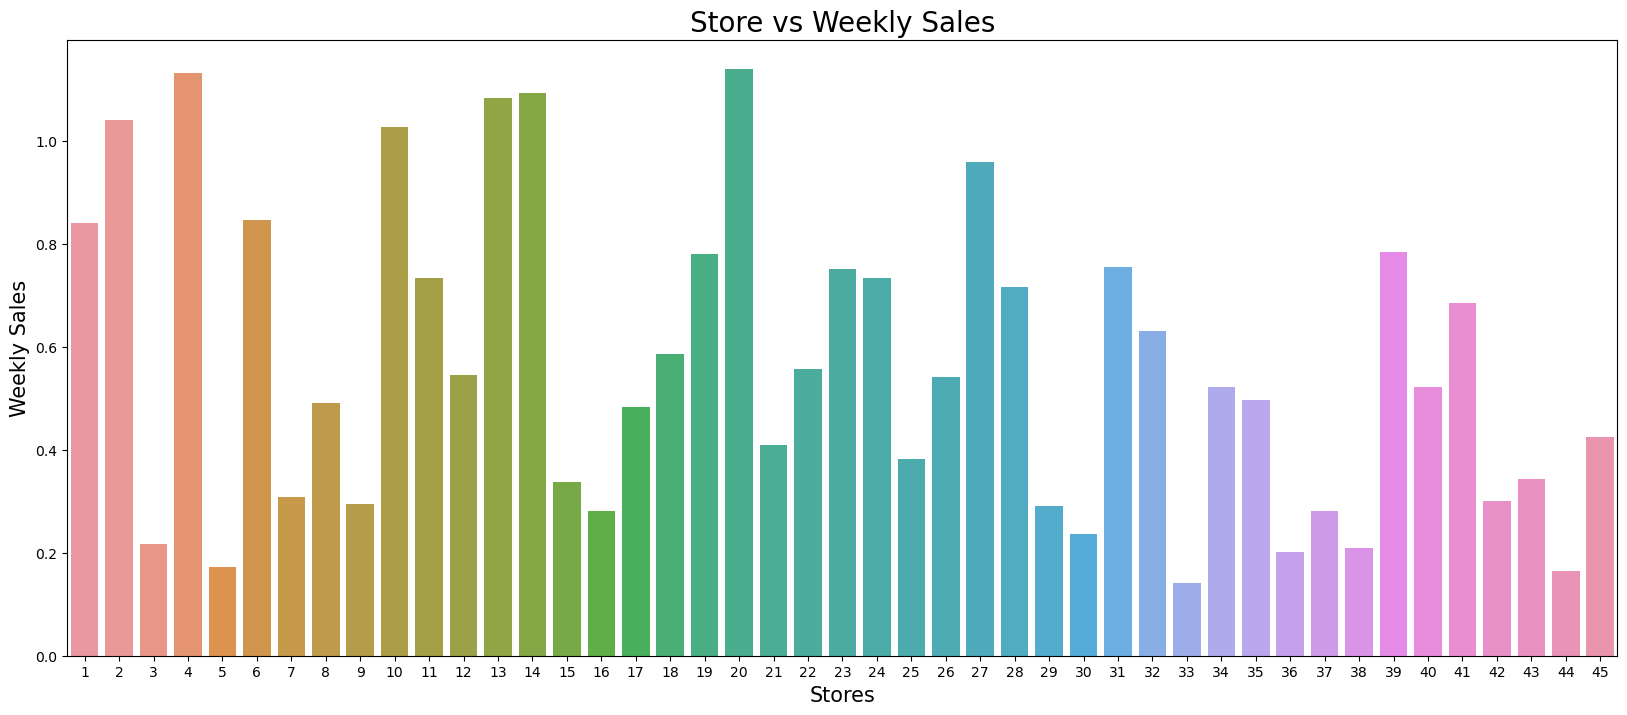

In [30]:
#ploting the Bar plot for Store vs Weekly Sales.

plt.figure(figsize = (20,8))
sns.barplot(data = avg_sales, x = avg_sales.index, y ='Weekly_Sales')
plt.xlabel('Stores',fontsize = 15)
plt.ylabel('Weekly Sales', fontsize = 15)
plt.title('Store vs Weekly Sales', fontsize = 20)
plt.show()

In [31]:
#Top 5 Weekly sales stores

avg_sales.sort_values('Weekly_Sales',ascending = False ).head(5)

Weekly_Sales
Store              
20         1.140632
4          1.133616
14         1.093712
13         1.084319
2          1.042177

By using the given historical data we see the 20,4,14,13,2 thses store are performing well.

### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [32]:
#Top 5 worse Performing Store.

avg_sales.sort_values('Weekly_Sales',ascending = True ).head(5)

Weekly_Sales
Store              
33         0.140632
44         0.163842
5          0.172102
36         0.202137
38         0.208750

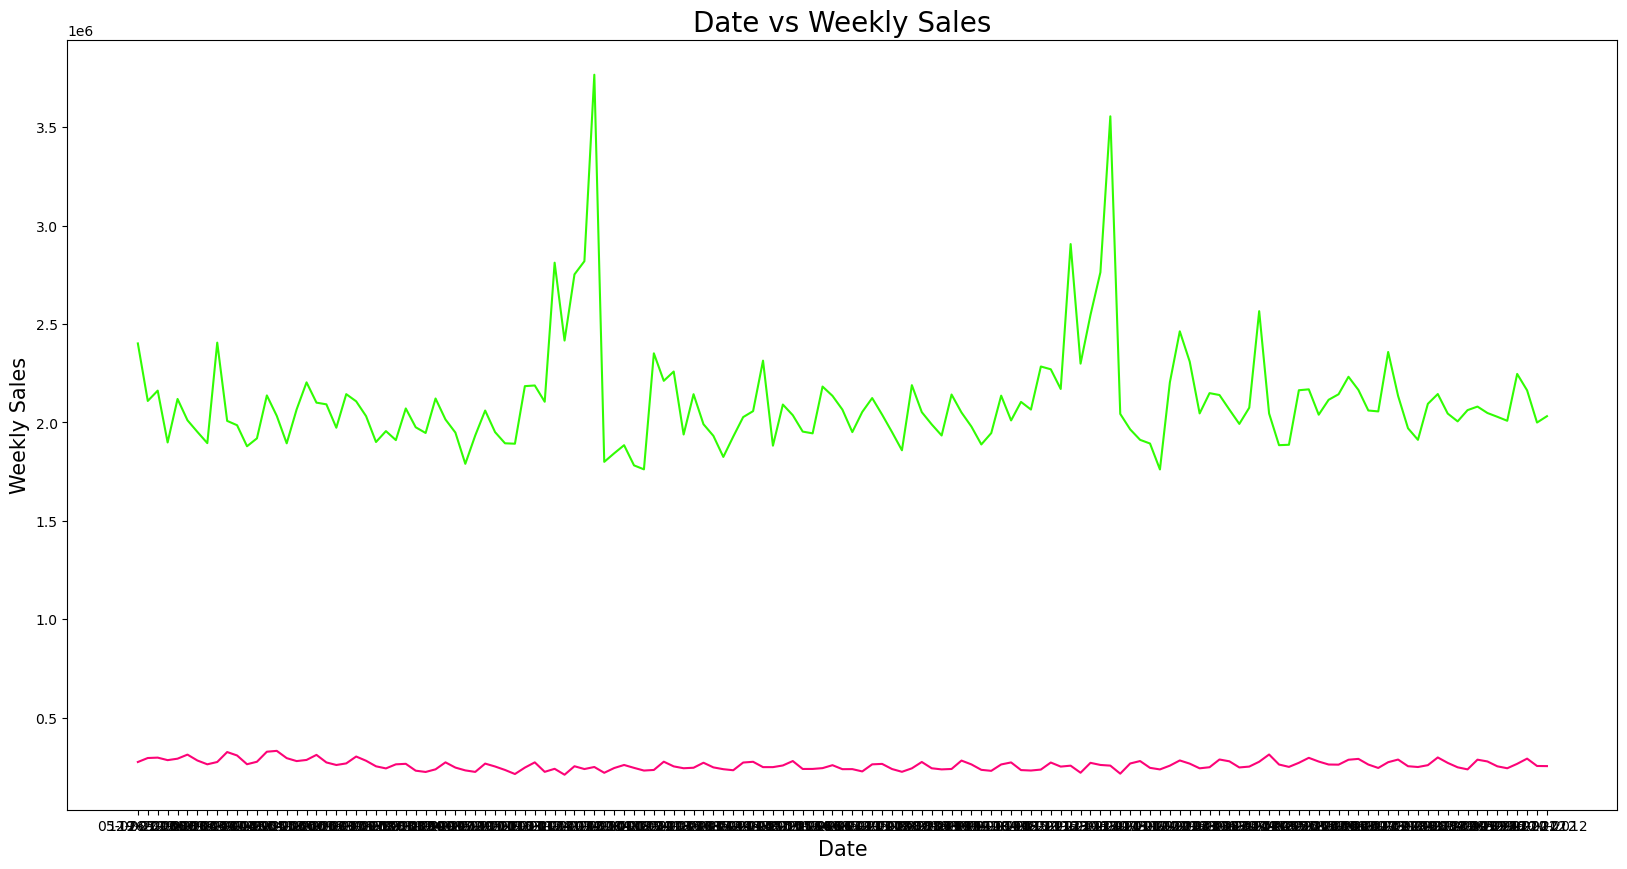

In [33]:
#ploting the line plot for total period vs Weekly Sales.

plt.figure(figsize = (20,10))
sns.lineplot(data = Store20, x= 'Date', y ='Weekly_Sales', color = '#31fc03')
sns.lineplot(data = Store33, x= 'Date', y ='Weekly_Sales', color = '#fc0377')
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Weekly Sales', fontsize = 15)
plt.title('Date vs Weekly Sales', fontsize = 20)
plt.show()

In [34]:
#The difference between the highest and lowest performing stores.

diff_higf_to_low=pd.DataFrame(avg_score_sales)

In [35]:
(diff_higf_to_low.loc[33][0]/diff_higf_to_low.loc[20][0])*100

12.329294669579147

Lowest performing store's sales only accounts for 12.3% of sales done by top performing store on average.

In [36]:
#The least performing store is store 33, we finding the over all percentage of performing store.

sum_of_all_sales = avg_score_sales.sum()

In [37]:
sum_of_sales_for_33th_shop = avg_score_sales.loc[33]

In [38]:
per_of_total_sales_to_33_shop = (sum_of_sales_for_33th_shop/sum_of_all_sales)*100

In [39]:
per_of_total_sales_to_33_shop

0.5515661882313292

Store no.33 is 0.5 percenrtage of weelky sales.

### In the hole Walmart store No.33 is performing less, it about 0.55 percentage only.

## 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [40]:
#importing the Libearys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('./Walmart.csv')

In [42]:
data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [43]:
#seeing the number of store in the dataset

store_numbers=list(data['Store'].unique())
len(store_numbers)

45

In [44]:
#Converting the data to store wise

for i in range(1,len(store_numbers)+1):
    globals()[f'sales{i}'] = data[data['Store'] == i][['Date','Weekly_Sales']]

In [45]:
#Importing the required libeary

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
len(store_numbers)

45

### Solving all the 45 store are more time consuming process, so we took minimum 5 stores from the data and do the forecast

#### Selected store are 1, 14, 20, 33,44 (4,20 - top performing store and 33,44 - worst performing store)

In [47]:
#Selecting the Store 1

sales1

Date  Weekly_Sales
0    05-02-2010    1643690.90
1    12-02-2010    1641957.44
2    19-02-2010    1611968.17
3    26-02-2010    1409727.59
4    05-03-2010    1554806.68
..          ...           ...
138  28-09-2012    1437059.26
139  05-10-2012    1670785.97
140  12-10-2012    1573072.81
141  19-10-2012    1508068.77
142  26-10-2012    1493659.74

[143 rows x 2 columns]

In [48]:
#converting the Date column as index

sales1.index = sales1['Date']
del sales1['Date']
sales1

Weekly_Sales
Date                    
05-02-2010    1643690.90
12-02-2010    1641957.44
19-02-2010    1611968.17
26-02-2010    1409727.59
05-03-2010    1554806.68
...                  ...
28-09-2012    1437059.26
05-10-2012    1670785.97
12-10-2012    1573072.81
19-10-2012    1508068.77
26-10-2012    1493659.74

[143 rows x 1 columns]

<Axes: xlabel='Date'>

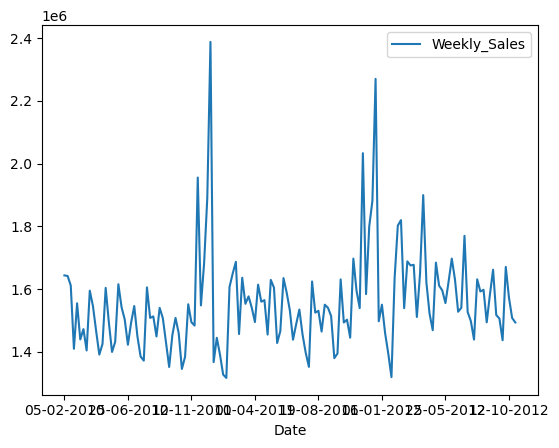

In [49]:
#ploting the lineplot for Store 1 weekly sales

sales1.plot()

In [50]:
# Rolling Mean Method and Rolling std. dev method for the Store 1.

mean_log=sales1.rolling(window=12).mean() 
std_log=sales1.rolling(window=12).std()  

Text(0.5, 1.0, 'Comparison of Time Series Data')

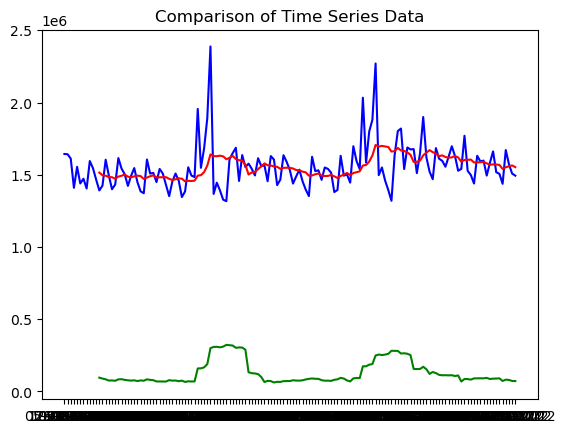

In [51]:
#plotting the line plot for the Rolling Mean and Rolling std. dev

plt.plot(sales1,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [52]:
# checking the stationarity of the time series data and adfuller - Augmented Dickey Fuller

result=adfuller(sales1['Weekly_Sales'])
print(result)

(-5.102186145192288, 1.3877788330759434e-05, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3412.7325502876756)


<Axes: xlabel='Date'>

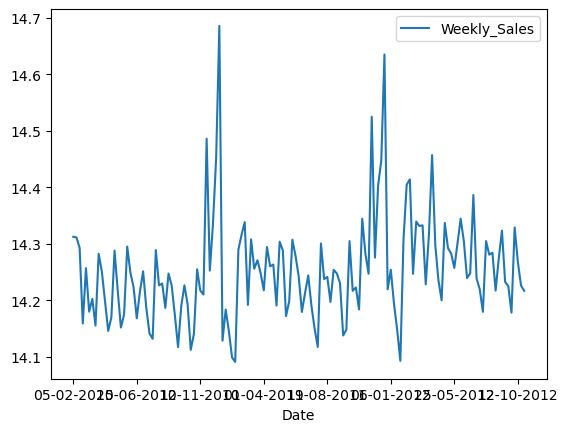

In [53]:
# The above value is greater than 0.05, so the Data is non stationary.
# Log-Transformation Method of converting the non stationary data into stationary data

sales1_log=np.log(sales1)
sales1_log=sales1_log.dropna()
sales1_log.plot()

Text(0.5, 1.0, 'Comparison of Time Series Data')

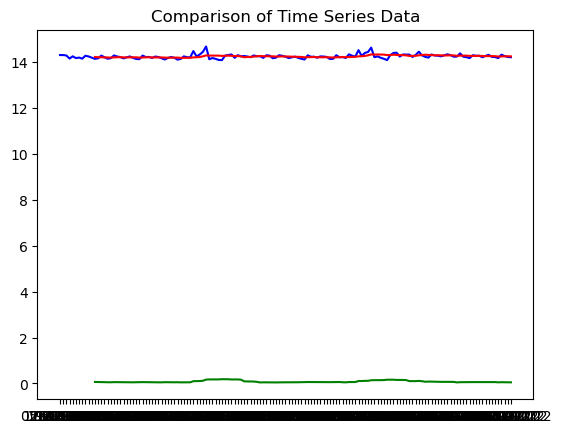

In [54]:
# Again plotting the line plot for the Rolling Mean and Rolling std. dev to see the difference of stationary data

mean_log=sales1_log.rolling(window=12).mean() 
std_log=sales1_log.rolling(window=12).std()  

plt.plot(sales1_log,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [55]:
#Again adfuller for stationary data

result2=adfuller(sales1_log['Weekly_Sales'])
print(result2)

(-5.124252129286304, 1.2527353486501525e-05, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, -261.4016619371723)


<Axes: xlabel='Date'>

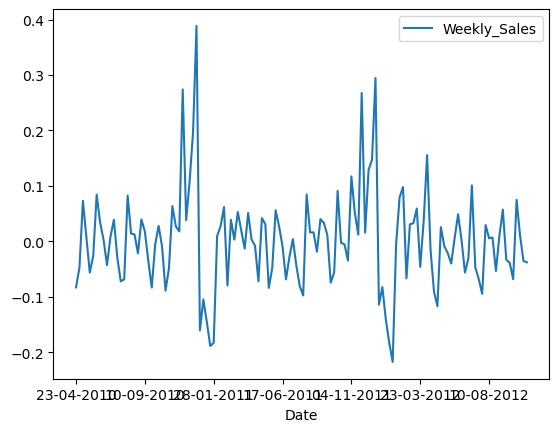

In [56]:
# first_log is the variable giving the plot for the original time series data after normalizaing it using log method
# mean_log to check the stationarity
# first_log and mean_log difference

sales1_new=sales1_log-mean_log
sales1_new=sales1_new.dropna()
sales1_new.plot()

In [57]:
# After the process the shape of the data

sales1_new.shape

(132, 1)

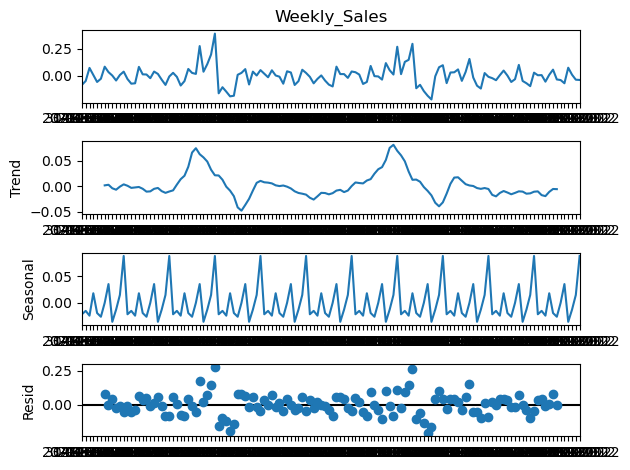

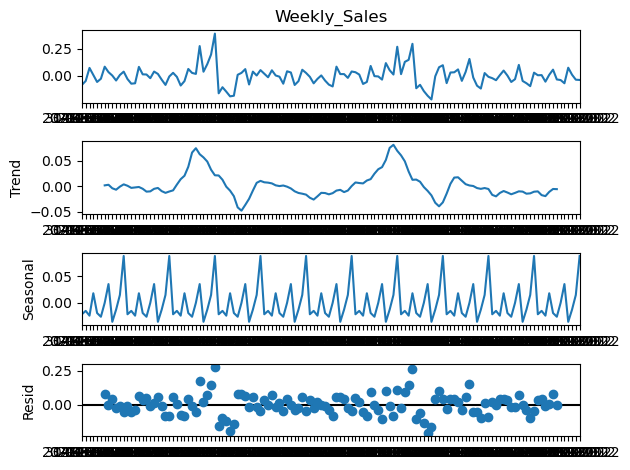

In [58]:
# plotting the decompose_result

decompose_result=seasonal_decompose(sales1_new['Weekly_Sales'],period=12)
decompose_result.plot()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


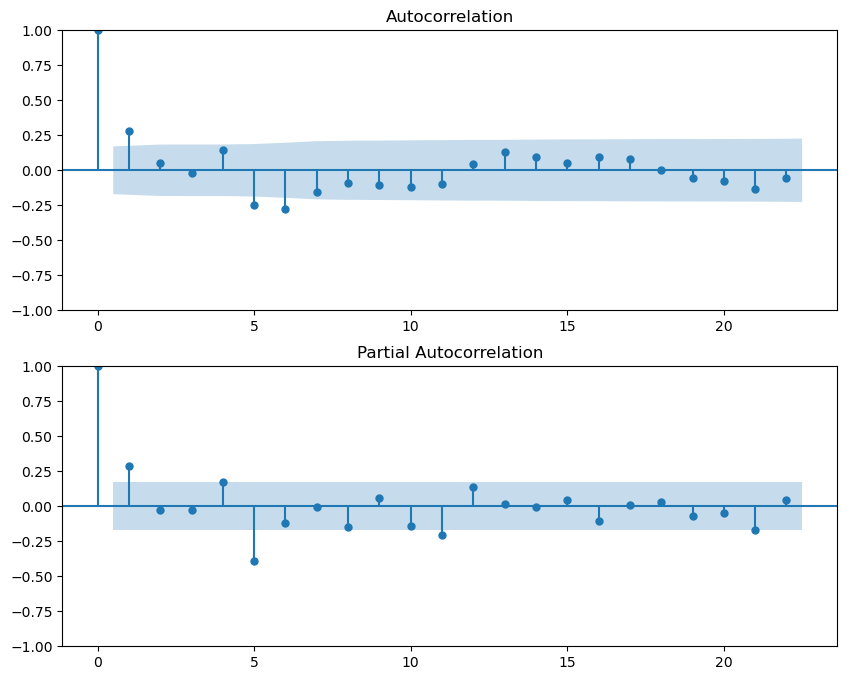

In [59]:
#Plotting the acf and pacf plot

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(sales1_new['Weekly_Sales'], ax=ax[0],)
plot_pacf(sales1_new['Weekly_Sales'], ax=ax[1],)
plt.show()

In [60]:
#model splitting the train and test data

train=sales1_new.iloc[:106]['Weekly_Sales']
test=sales1_new.iloc[107:]['Weekly_Sales']

In [61]:
#ARIMA MODEL
#the value of p=1,d=0,q=5 we took the data from the above acf and pacf plot.

model = ARIMA(train, order=(1, 0, 5)) #p=1,d=0,q=5 from the acf and pacf plot
model_fit = model.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [62]:
model_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

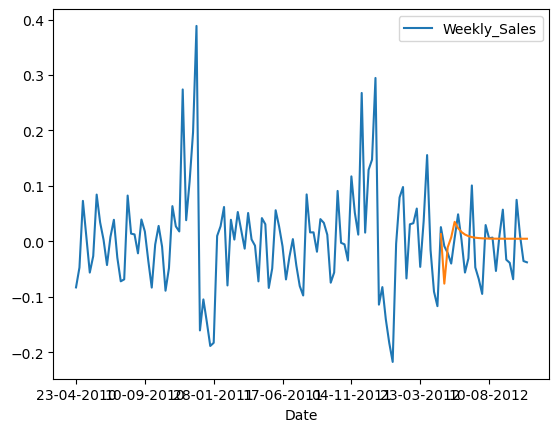

In [63]:
#See the forcast of ARIMA MODEL

forecast = model_fit.forecast(steps=26) 
sales1_new.plot()
forecast.plot()

### In ARIMA model the forecast not performing well so did SARIMAX MODEL

In [64]:
#SARIMAX MODEL

model1 = SARIMAX(train, order=(1, 0, 5),seasonal_order=(1,0,5,26))  #p=1,d=0,q=5 from the acf and pacf plot
model1_fit = model1.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [65]:
model1_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

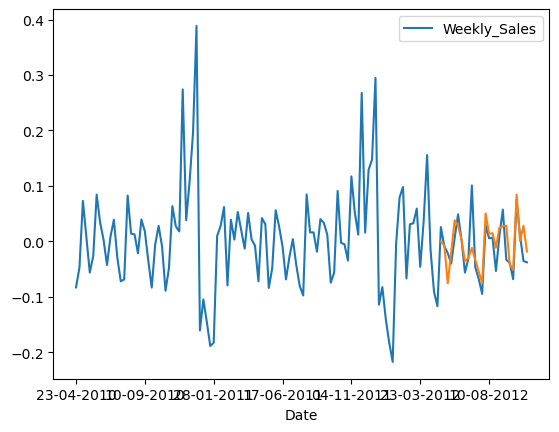

In [66]:
#See the forcast of SARIMAX MODEL

forecast = model1_fit.forecast(steps=26)  
sales1_new.plot()
forecast.plot()

### Forecast the sales for Store 1 for the next 12 weeks.

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

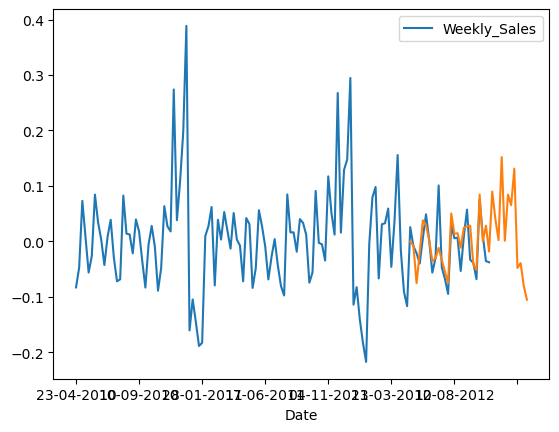

In [67]:
# Forcast of next 12 weeks data of store 1

forecast = model1_fit.forecast(steps=26+12)  # Forecasting for the next 12 periods
sales1_new.plot()
forecast.plot()

## Store 14

In [68]:
#Selecting the Store 14

sales14

Date  Weekly_Sales
1859  05-02-2010    2623469.95
1860  12-02-2010    1704218.84
1861  19-02-2010    2204556.70
1862  26-02-2010    2095591.63
1863  05-03-2010    2237544.75
...          ...           ...
1997  28-09-2012    1522512.20
1998  05-10-2012    1687592.16
1999  12-10-2012    1639585.61
2000  19-10-2012    1590274.72
2001  26-10-2012    1704357.62

[143 rows x 2 columns]

In [69]:
#converting the Date column as index

sales14.index = sales14['Date']
del sales14['Date']
sales14

Weekly_Sales
Date                    
05-02-2010    2623469.95
12-02-2010    1704218.84
19-02-2010    2204556.70
26-02-2010    2095591.63
05-03-2010    2237544.75
...                  ...
28-09-2012    1522512.20
05-10-2012    1687592.16
12-10-2012    1639585.61
19-10-2012    1590274.72
26-10-2012    1704357.62

[143 rows x 1 columns]

<Axes: xlabel='Date'>

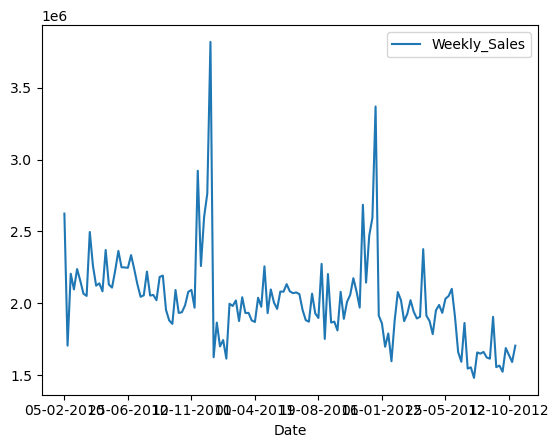

In [70]:
#ploting the lineplot for Store 14 weekly sales

sales14.plot()

In [71]:
# Rolling Mean Method and Rolling std. dev method for the Store 14.

mean_log=sales14.rolling(window=12).mean() 
std_log=sales14.rolling(window=12).std()  

Text(0.5, 1.0, 'Comparison of Time Series Data')

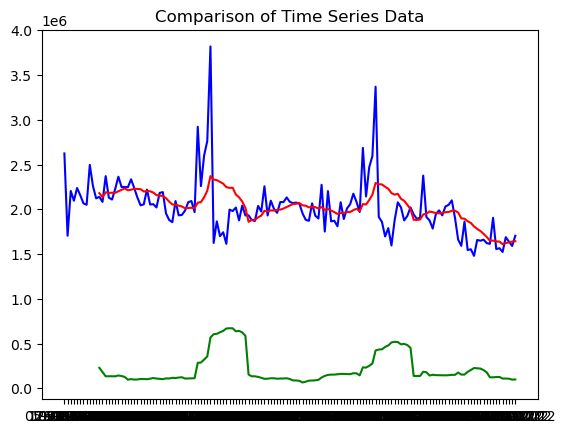

In [72]:
#plotting the line plot for the Rolling Mean and Rolling std. dev

plt.plot(sales14,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [73]:
# checking the stationarity of the time series data and adfuller - Augmented Dickey Fuller

result=adfuller(sales14['Weekly_Sales'])
print(result)

(-2.7368866106752, 0.06786986708375098, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3564.7634948094546)


<Axes: xlabel='Date'>

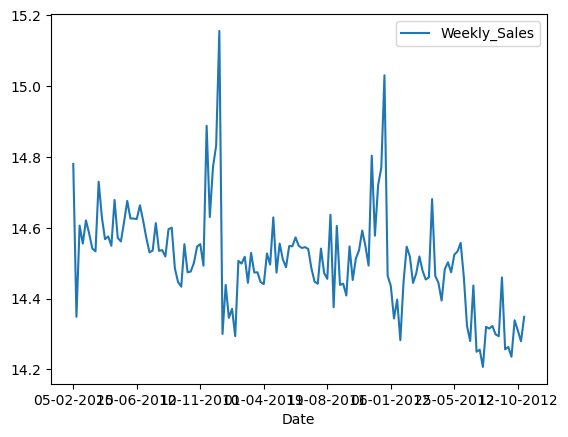

In [74]:
# The above value is greater than 0.05, so the Data is non stationary.
# Log-Transformation Method of converting the non stationary data into stationary data

sales14_log=np.log(sales14)
sales14_log=sales14_log.dropna()
sales14_log.plot()

Text(0.5, 1.0, 'Comparison of Time Series Data')

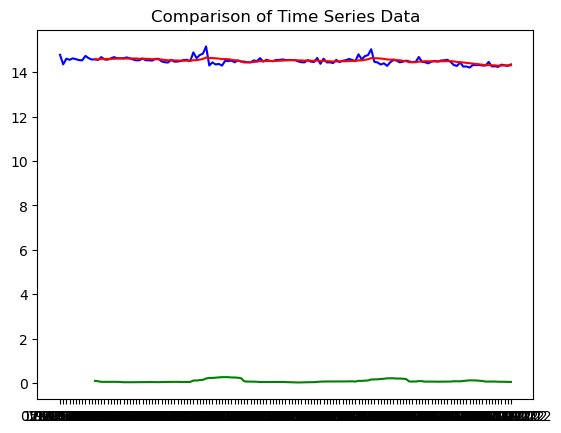

In [75]:
# Again plotting the line plot for the Rolling Mean and Rolling std. dev to see the difference of stationary data

mean_log=sales14_log.rolling(window=12).mean() 
std_log=sales14_log.rolling(window=12).std()  

plt.plot(sales14_log,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [76]:
#Again adfuller for stationary data

result2=adfuller(sales14_log['Weekly_Sales'])
print(result2)

(-2.3832460394308015, 0.14652103114985948, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, -193.9820385021169)


<Axes: xlabel='Date'>

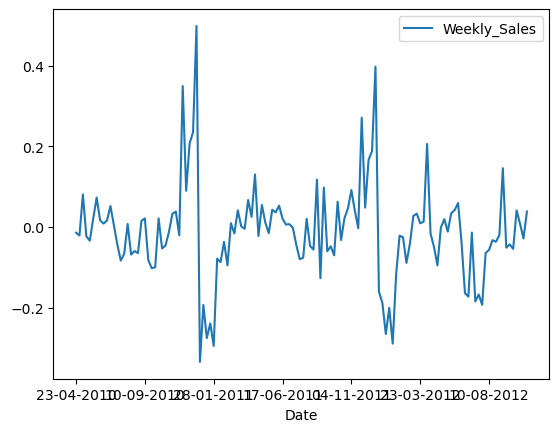

In [77]:
# first_log is the variable giving the plot for the original time series data after normalizaing it using log method
# mean_log to check the stationarity
# first_log and mean_log difference

sales14_new=sales14_log-mean_log
sales14_new=sales14_new.dropna()
sales14_new.plot()

In [78]:
# After the process the shape of the data

sales14_new.shape

(132, 1)

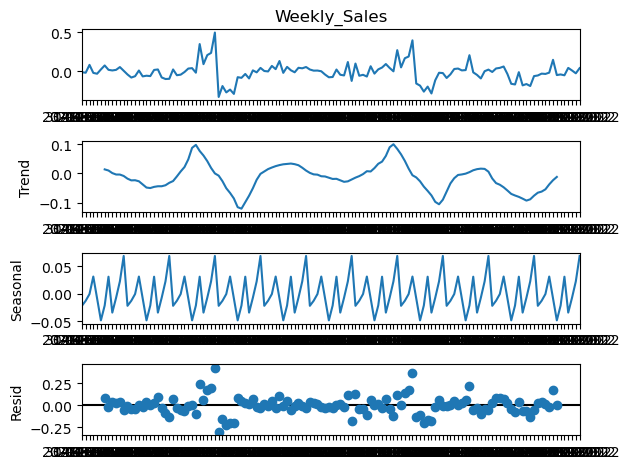

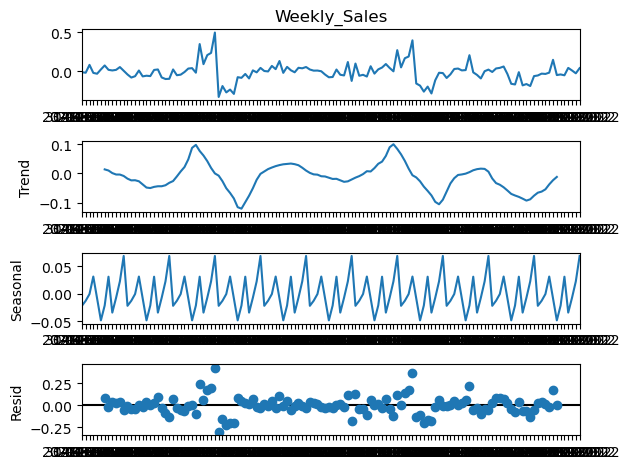

In [79]:
# plotting the decompose_result

decompose_result=seasonal_decompose(sales14_new['Weekly_Sales'],period=12)
decompose_result.plot()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


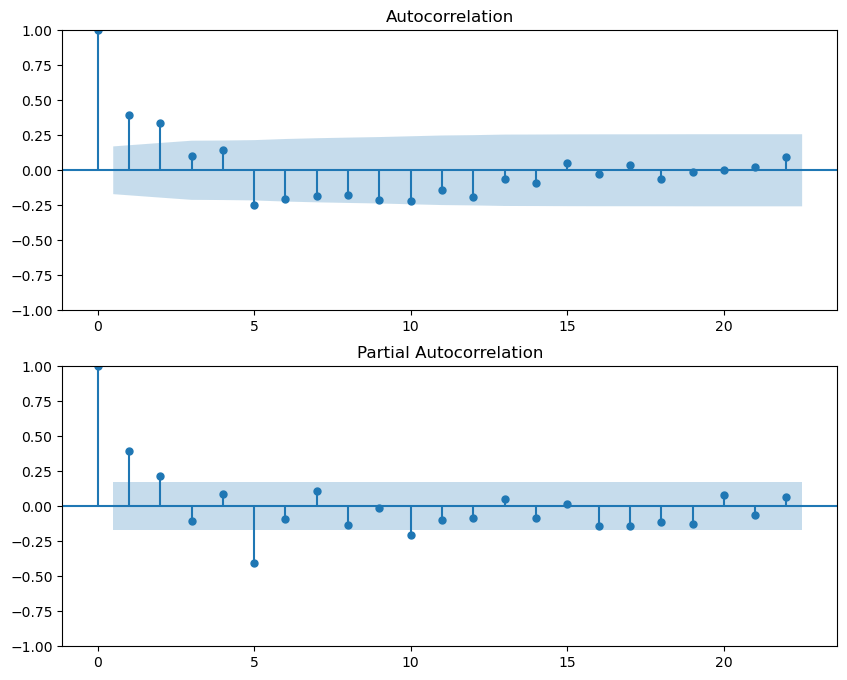

In [80]:
#Plotting the acf and pacf plot

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(sales14_new['Weekly_Sales'], ax=ax[0],)
plot_pacf(sales14_new['Weekly_Sales'], ax=ax[1],)
plt.show()

In [81]:
#model splitting the train and test data

train=sales14_new.iloc[:106]['Weekly_Sales']
test=sales14_new.iloc[107:]['Weekly_Sales']

In [82]:
#ARIMA MODEL
#the value of p=1,d=0,q=3 we took the data from the above acf and pacf plot.

model = ARIMA(train, order=(1, 0, 3))  # p=1,d=0,q=3 from the above acf and pacf plot
model_fit = model.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [83]:
model_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

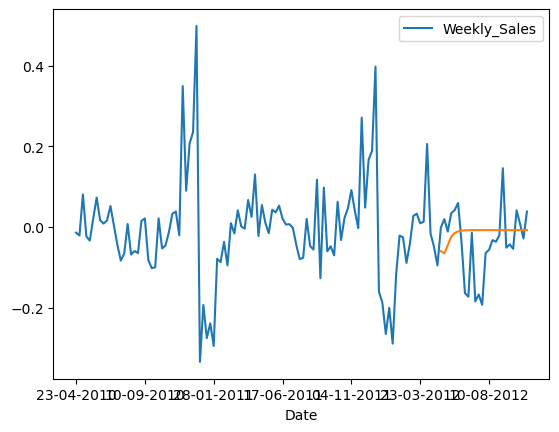

In [84]:
#See the forcast of ARIMA MODEL

forecast = model_fit.forecast(steps=26)
sales14_new.plot()
forecast.plot()

### In ARIMA model the forecast not performing well so did SARIMAX MODEL

In [85]:
#SARIMAX MODEL

model1 = SARIMAX(train, order=(1, 0, 3),seasonal_order=(1,0,3,26))  # p=1,d=0,q=3 from the above acf and pacf plot
model1_fit = model1.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [86]:
model1_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

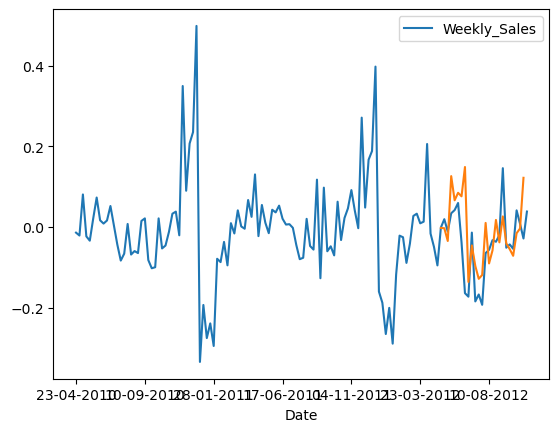

In [87]:
#See the forcast of SARIMAX MODEL

forecast = model1_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)  
sales14_new.plot()
forecast.plot()

### Forecast of weekly sale for next 12 weeks for store 14 

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

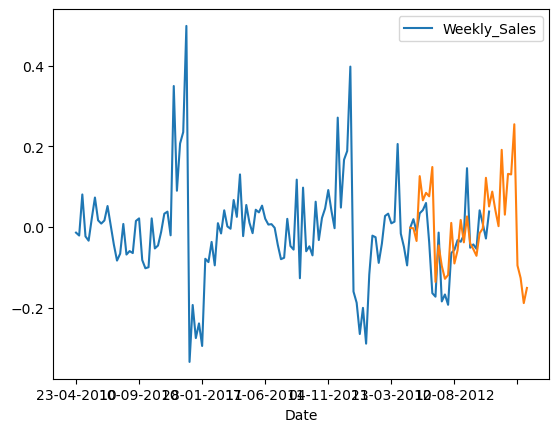

In [88]:
# Forcast of next 12 weeks data of store 14

forecast = model1_fit.forecast(steps=26+12)  # Forecasting for the next 12 periods
sales14_new.plot()
forecast.plot()

## Store 20

In [89]:
#Selecting the Store 20

sales20

Date  Weekly_Sales
2717  05-02-2010    2401395.47
2718  12-02-2010    2109107.90
2719  19-02-2010    2161549.76
2720  26-02-2010    1898193.95
2721  05-03-2010    2119213.72
...          ...           ...
2855  28-09-2012    2008350.58
2856  05-10-2012    2246411.89
2857  12-10-2012    2162951.36
2858  19-10-2012    1999363.49
2859  26-10-2012    2031650.55

[143 rows x 2 columns]

In [90]:
#converting the Date column as index

sales20.index = sales20['Date']
del sales20['Date']
sales20

Weekly_Sales
Date                    
05-02-2010    2401395.47
12-02-2010    2109107.90
19-02-2010    2161549.76
26-02-2010    1898193.95
05-03-2010    2119213.72
...                  ...
28-09-2012    2008350.58
05-10-2012    2246411.89
12-10-2012    2162951.36
19-10-2012    1999363.49
26-10-2012    2031650.55

[143 rows x 1 columns]

<Axes: xlabel='Date'>

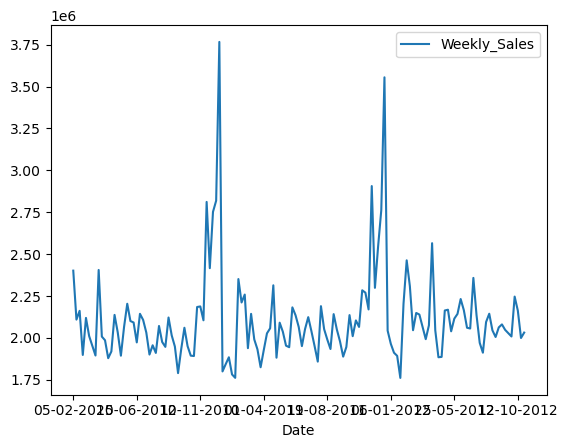

In [91]:
#ploting the lineplot for Store 20 weekly sales

sales20.plot()

In [92]:
# Rolling Mean Method and Rolling std. dev method for the Store 20.

mean_log=sales20.rolling(window=12).mean() 
std_log=sales20.rolling(window=12).std()  

Text(0.5, 1.0, 'Comparison of Time Series Data')

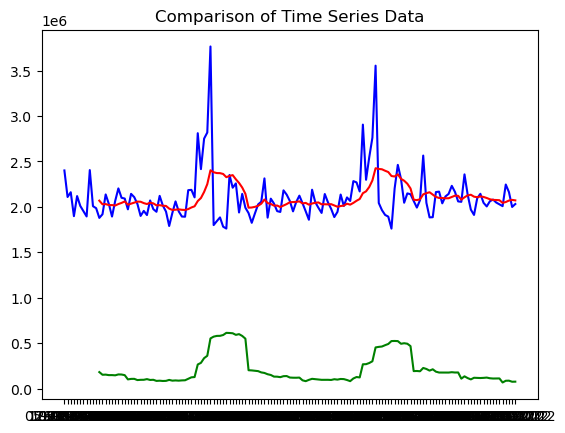

In [93]:
#plotting the line plot for the Rolling Mean and Rolling std. dev

plt.plot(sales20,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [94]:
# checking the stationarity of the time series data and adfuller - Augmented Dickey Fuller

result=adfuller(sales20['Weekly_Sales'])
print(result)

(-5.39373869285483, 3.4912952838128377e-06, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3553.6598733693677)


<Axes: xlabel='Date'>

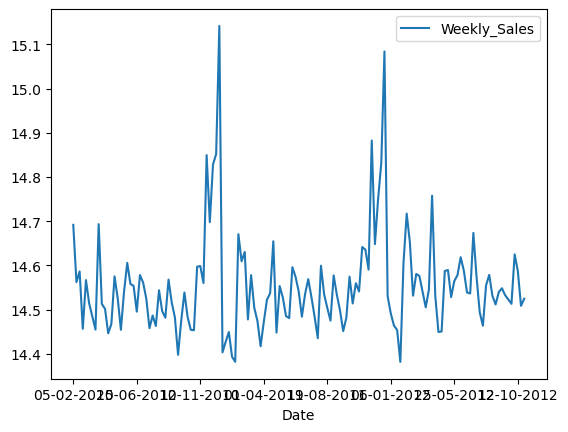

In [95]:
# The above value is greater than 0.05, so the Data is non stationary.
# Log-Transformation Method of converting the non stationary data into stationary data

sales20_log=np.log(sales20)
sales20_log=sales20_log.dropna()
sales20_log.plot()

Text(0.5, 1.0, 'Comparison of Time Series Data')

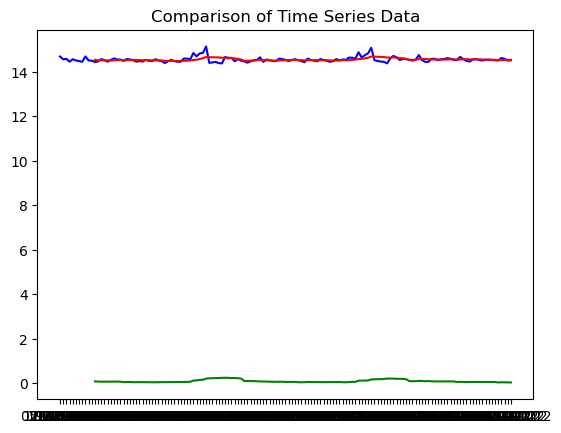

In [96]:
# Again plotting the line plot for the Rolling Mean and Rolling std. dev to see the difference of stationary data

mean_log=sales20_log.rolling(window=12).mean() 
std_log=sales20_log.rolling(window=12).std()  

plt.plot(sales20_log,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [97]:
#Again adfuller for stationary data

result2=adfuller(sales20_log['Weekly_Sales'])
print(result2)

(-5.615389243797445, 1.1776123782974648e-06, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, -217.47248716439844)


<Axes: xlabel='Date'>

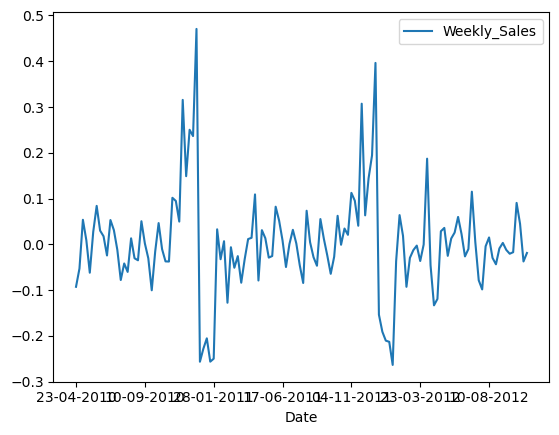

In [98]:
# first_log is the variable giving the plot for the original time series data after normalizaing it using log method
# mean_log to check the stationarity
# first_log and mean_log difference

sales20_new=sales20_log-mean_log
sales20_new=sales20_new.dropna()
sales20_new.plot()

In [99]:
# After the process the shape of the data

sales20_new.shape

(132, 1)

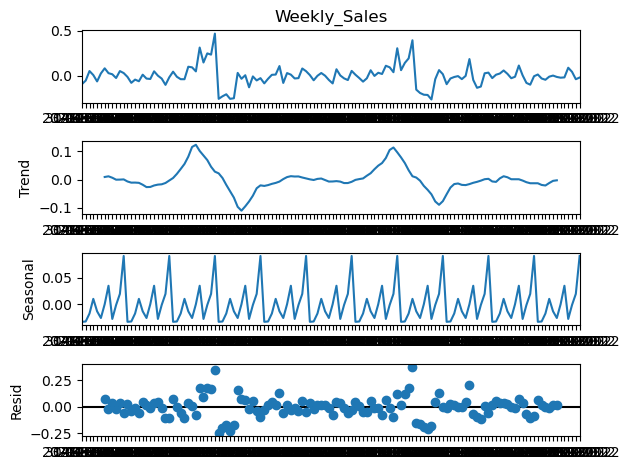

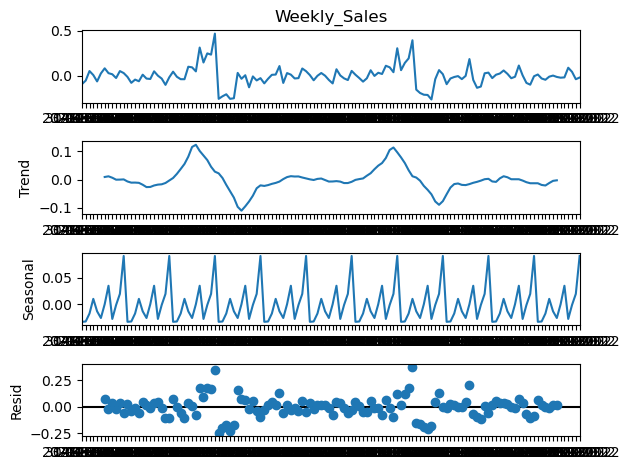

In [100]:
# plotting the decompose_result

decompose_result=seasonal_decompose(sales20_new['Weekly_Sales'],period=12)
decompose_result.plot()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


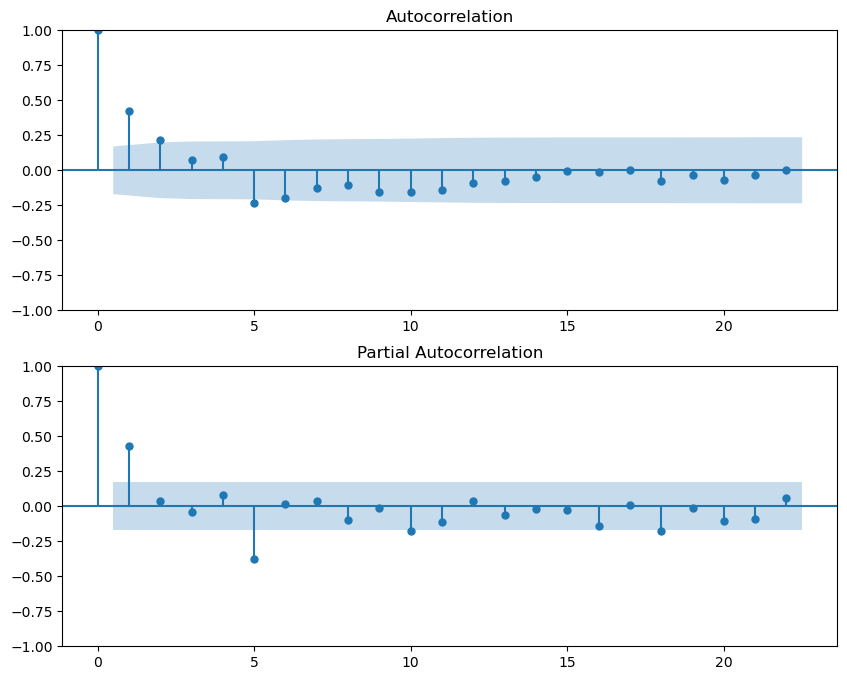

In [101]:
#Plotting the acf and pacf plot

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(sales20_new['Weekly_Sales'], ax=ax[0],)
plot_pacf(sales20_new['Weekly_Sales'], ax=ax[1],)
plt.show()

In [102]:
#model splitting the train and test data

train=sales20_new.iloc[:106]['Weekly_Sales']
test=sales20_new.iloc[107:]['Weekly_Sales']

In [103]:
#ARIMA MODEL
#the value of p=1,d=0,q=3 we took the data from the above acf and pacf plot.

model = ARIMA(train, order=(1, 0, 3))  # p=1,d=0,q=3 from the above acf and pacf plot
model_fit = model.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [104]:
model_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

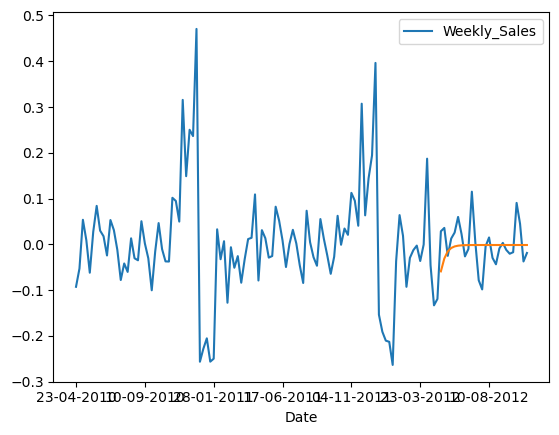

In [105]:
#See the forcast of ARIMA MODEL

forecast = model_fit.forecast(steps=26)
sales20_new.plot()
forecast.plot()

### In ARIMA model the forecast not performing well so did SARIMAX MODEL

In [106]:
#SARIMAX MODEL

model1 = SARIMAX(train, order=(1, 0, 3),seasonal_order=(1,0,3,26))  #p=1,d=0,q=3 from the above acf and pacf plot
model1_fit = model1.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [107]:
model1_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

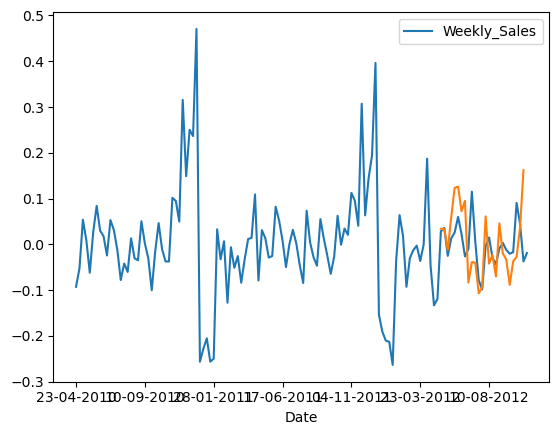

In [108]:
#See the forcast of SARIMAX MODEL

forecast = model1_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)  
sales20_new.plot()
forecast.plot()

### Forecast of weekly sale for next 12 weeks for store 20

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

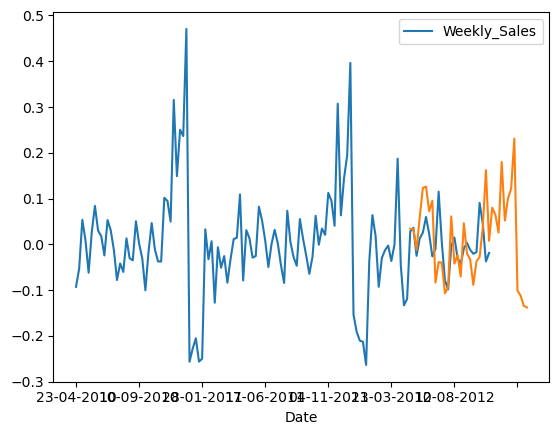

In [109]:
# Forcast of next 12 weeks data of store 20

forecast = model1_fit.forecast(steps=26+12)  # Forecasting for the next 12 periods
sales20_new.plot()
forecast.plot()

## Store 33

In [110]:
#Selecting the Store 33

sales33

Date  Weekly_Sales
4576  05-02-2010     274593.43
4577  12-02-2010     294882.83
4578  19-02-2010     296850.83
4579  26-02-2010     284052.77
4580  05-03-2010     291484.89
...          ...           ...
4714  28-09-2012     242813.51
4715  05-10-2012     265444.90
4716  12-10-2012     291781.15
4717  19-10-2012     254412.34
4718  26-10-2012     253731.13

[143 rows x 2 columns]

In [111]:
#converting the Date column as index

sales33.index = sales33['Date']
del sales33['Date']
sales33

Weekly_Sales
Date                    
05-02-2010     274593.43
12-02-2010     294882.83
19-02-2010     296850.83
26-02-2010     284052.77
05-03-2010     291484.89
...                  ...
28-09-2012     242813.51
05-10-2012     265444.90
12-10-2012     291781.15
19-10-2012     254412.34
26-10-2012     253731.13

[143 rows x 1 columns]

<Axes: xlabel='Date'>

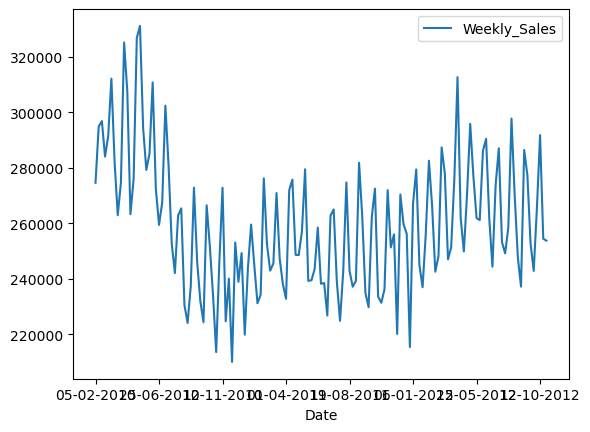

In [112]:
#ploting the lineplot for Store 33 weekly sales

sales33.plot()

In [113]:
# Rolling Mean Method and Rolling std. dev method for the Store 33.

mean_log=sales33.rolling(window=12).mean() 
std_log=sales33.rolling(window=12).std()  

Text(0.5, 1.0, 'Comparison of Time Series Data')

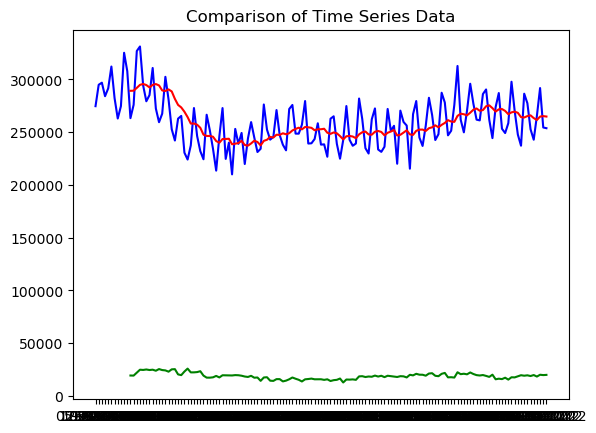

In [114]:
#plotting the line plot for the Rolling Mean and Rolling std. dev

plt.plot(sales33,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [115]:
# checking the stationarity of the time series data and adfuller - Augmented Dickey Fuller

result=adfuller(sales33['Weekly_Sales'])
print(result)

(-4.1378733255323, 0.000837955226973576, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, 2732.586113692095)


In [116]:
#The value is lesser than 0.05 so the data is stationery.
# After the process the shape of the data

sales33.shape

(143, 1)

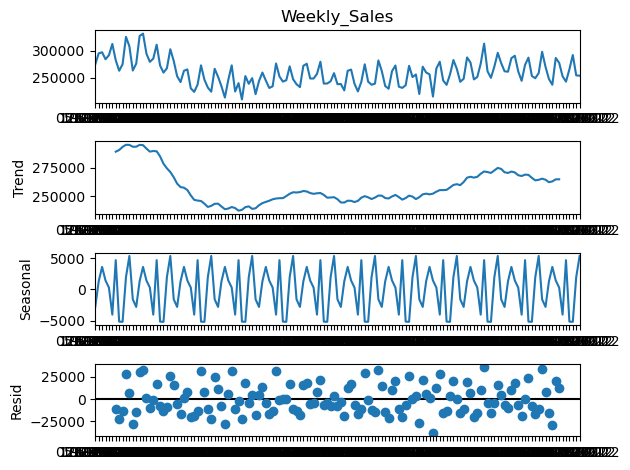

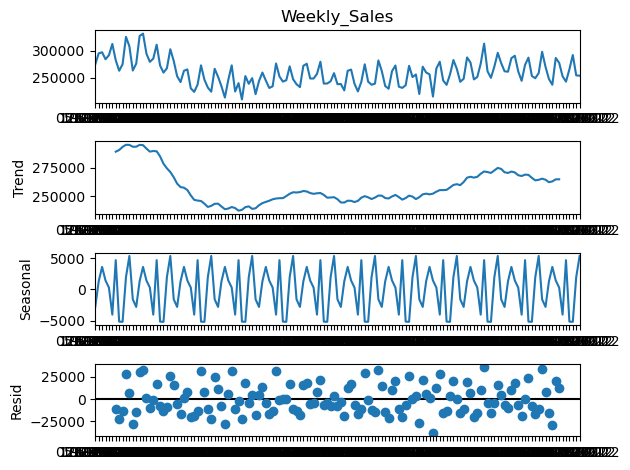

In [117]:
# plotting the decompose_result

decompose_result=seasonal_decompose(sales33['Weekly_Sales'],period=12)
decompose_result.plot()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


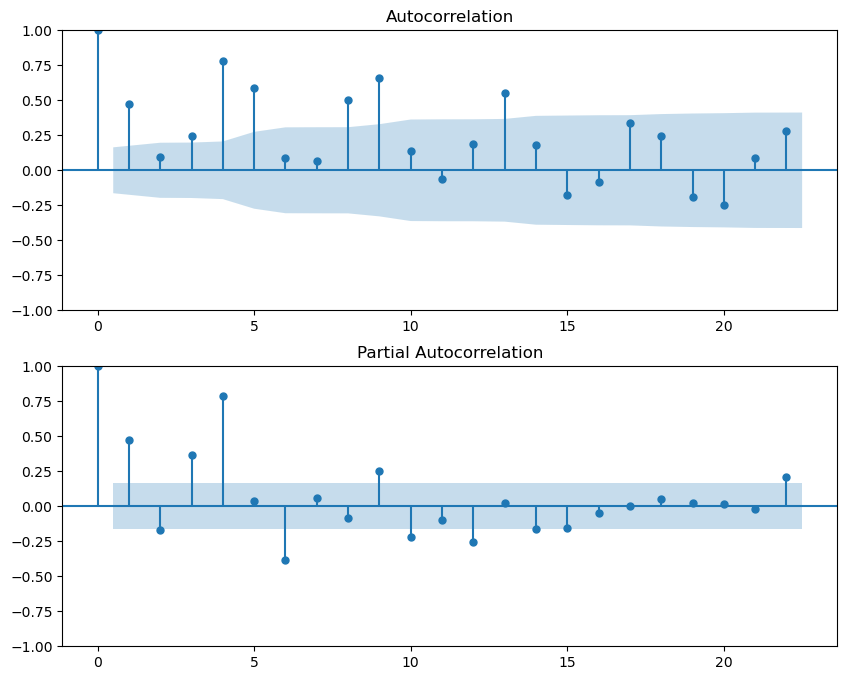

In [118]:
#Plotting the acf and pacf plot

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(sales33['Weekly_Sales'], ax=ax[0],)
plot_pacf(sales33['Weekly_Sales'], ax=ax[1],)
plt.show()

In [119]:
#model splitting the train and test data

train=sales33.iloc[:114]['Weekly_Sales']
test=sales33.iloc[115:]['Weekly_Sales']

In [120]:
#ARIMA MODEL
#the value of p=1,d=0,q=2 we took the data from the above acf and pacf plot.

model = ARIMA(train, order=(1, 0, 2)) #p=1,d=0,q=2 from the above acf and pacf plot
model_fit = model.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [121]:
model_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

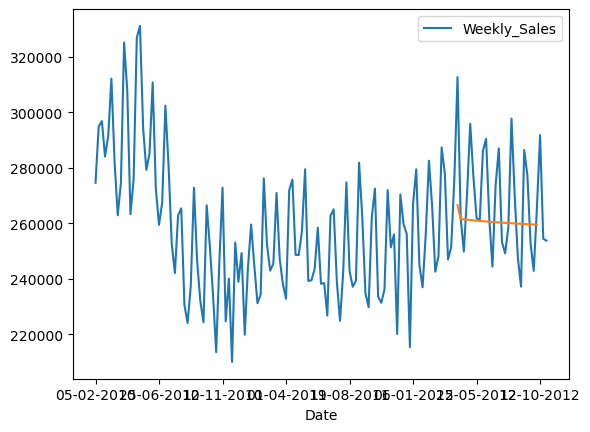

In [122]:
#See the forcast of ARIMA MODEL

forecast = model_fit.forecast(steps=26)
sales33.plot()
forecast.plot()

### In ARIMA model the forecast not performing well so did SARIMAX MODEL

In [123]:
#SARIMAX MODEL

model1 = SARIMAX(train, order=(1, 0, 2),seasonal_order=(1,0,2,26))  ##p=1,d=0,q=2 from the above acf and pacf plot
model1_fit = model1.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [124]:
model1_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

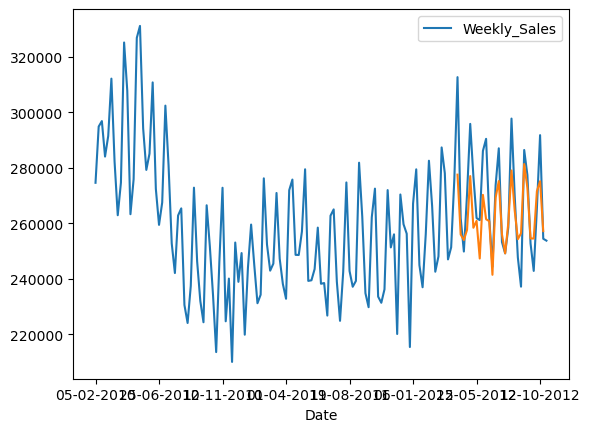

In [125]:
#See the forcast of SARIMAX MODEL

forecast = model1_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)  
sales33.plot()
forecast.plot()

### Forecast of weekly sale for next 12 weeks for store 33 

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

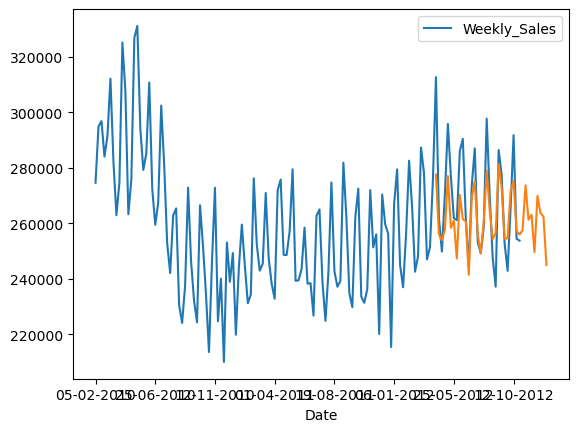

In [126]:
# Forcast of next 12 weeks data of store 33

forecast = model1_fit.forecast(steps=26+12)  # Forecasting for the next 12 periods
sales33.plot()
forecast.plot()

# Shop 44

In [127]:
#Selecting the Store 44

sales44

Date  Weekly_Sales
6149  05-02-2010     281090.95
6150  12-02-2010     286857.13
6151  19-02-2010     267956.30
6152  26-02-2010     273079.07
6153  05-03-2010     284617.27
...          ...           ...
6287  28-09-2012     355307.94
6288  05-10-2012     337390.44
6289  12-10-2012     337796.13
6290  19-10-2012     323766.77
6291  26-10-2012     361067.07

[143 rows x 2 columns]

In [128]:
#converting the Date column as index

sales44.index = sales44['Date']
del sales44['Date']
sales44

Weekly_Sales
Date                    
05-02-2010     281090.95
12-02-2010     286857.13
19-02-2010     267956.30
26-02-2010     273079.07
05-03-2010     284617.27
...                  ...
28-09-2012     355307.94
05-10-2012     337390.44
12-10-2012     337796.13
19-10-2012     323766.77
26-10-2012     361067.07

[143 rows x 1 columns]

<Axes: xlabel='Date'>

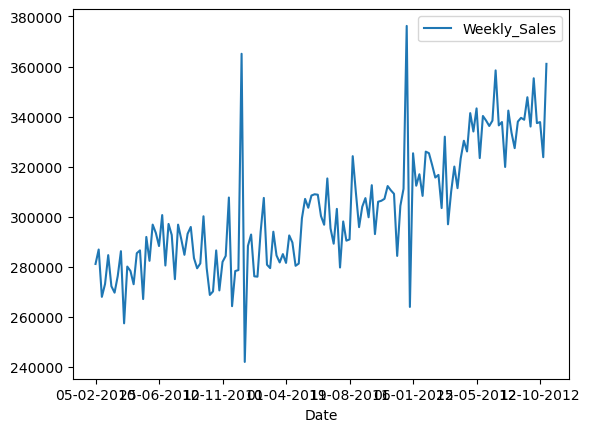

In [129]:
#ploting the lineplot for Store 44 weekly sales

sales44.plot()

In [130]:
# Rolling Mean Method and Rolling std. dev method for the Store 44.

mean_log=sales44.rolling(window=12).mean() 
std_log=sales44.rolling(window=12).std()  

Text(0.5, 1.0, 'Comparison of Time Series Data')

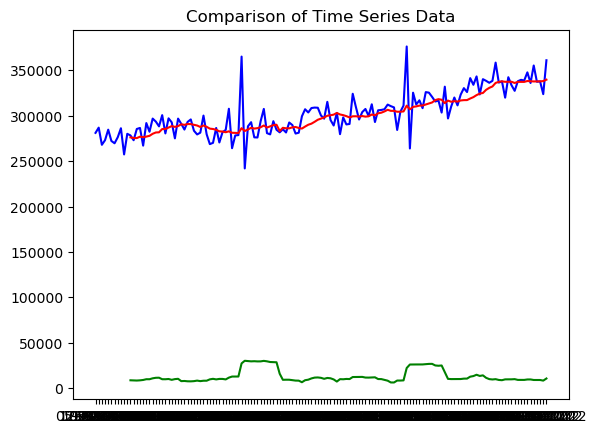

In [131]:
#plotting the line plot for the Rolling Mean and Rolling std. dev

plt.plot(sales44,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [132]:
# checking the stationarity of the time series data and adfuller - Augmented Dickey Fuller

result=adfuller(sales44['Weekly_Sales'])
print(result)

(-0.9837026947465901, 0.75916186357073, 3, 139, {'1%': -3.4782936965183815, '5%': -2.882567574015525, '10%': -2.5779830117488745}, 2838.3558794470596)


<Axes: xlabel='Date'>

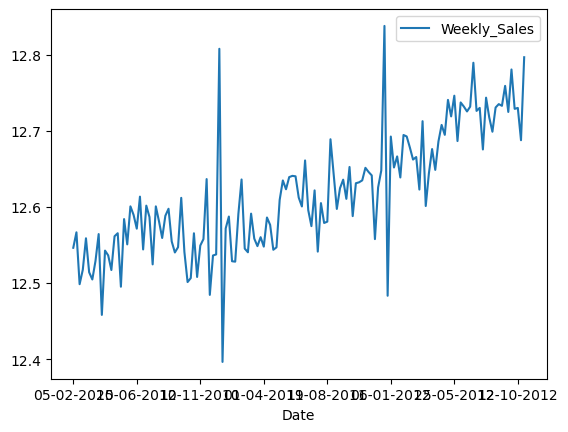

In [133]:
# The above value is greater than 0.05, so the Data is non stationary.
# Log-Transformation Method of converting the non stationary data into stationary data

sales44_log=np.log(sales44)
sales44_log=sales44_log.dropna()
sales44_log.plot()

Text(0.5, 1.0, 'Comparison of Time Series Data')

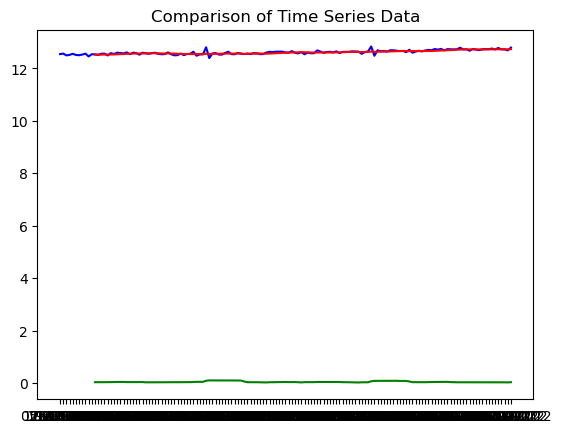

In [134]:
# Again plotting the line plot for the Rolling Mean and Rolling std. dev to see the difference of stationary data

mean_log=sales44_log.rolling(window=12).mean() 
std_log=sales44_log.rolling(window=12).std()  

plt.plot(sales44_log,color='blue',label='Original Time Series Data')
plt.plot(mean_log,color='red',label='Rolling Mean Time Series Data')
plt.plot(std_log,color='green',label='Rolling Std. Dev Time Series Data')
plt.title('Comparison of Time Series Data')

In [135]:
#Again adfuller for stationary data

result2=adfuller(sales44_log['Weekly_Sales'])
print(result2)

(-0.9844074052424931, 0.7589087750515338, 3, 139, {'1%': -3.4782936965183815, '5%': -2.882567574015525, '10%': -2.5779830117488745}, -399.88199288641385)


<Axes: xlabel='Date'>

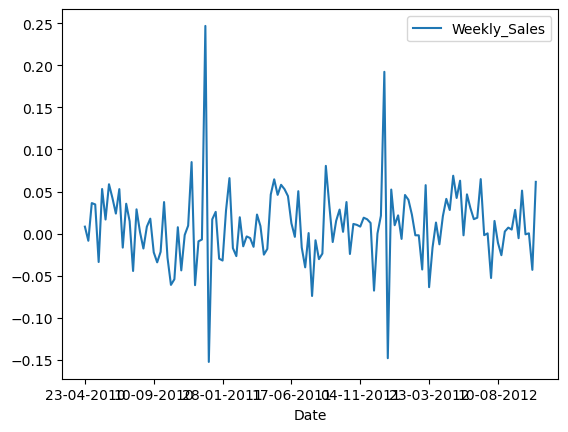

In [136]:
# first_log is the variable giving the plot for the original time series data after normalizaing it using log method
# mean_log to check the stationarity
# first_log and mean_log difference

sales44_new=sales44_log-mean_log
sales44_new=sales44_new.dropna()
sales44_new.plot()

In [137]:
# After the process the shape of the data

sales44_new.shape

(132, 1)

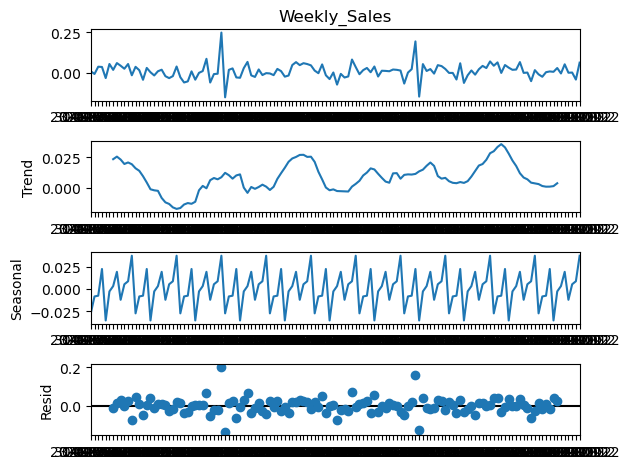

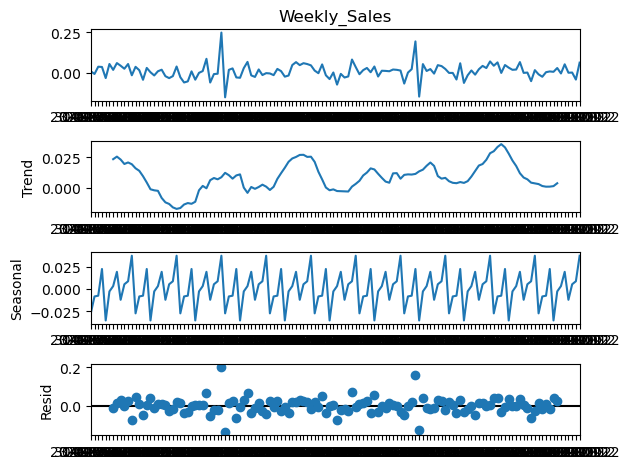

In [138]:
# plotting the decompose_result

decompose_result=seasonal_decompose(sales44_new['Weekly_Sales'],period=12)
decompose_result.plot()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


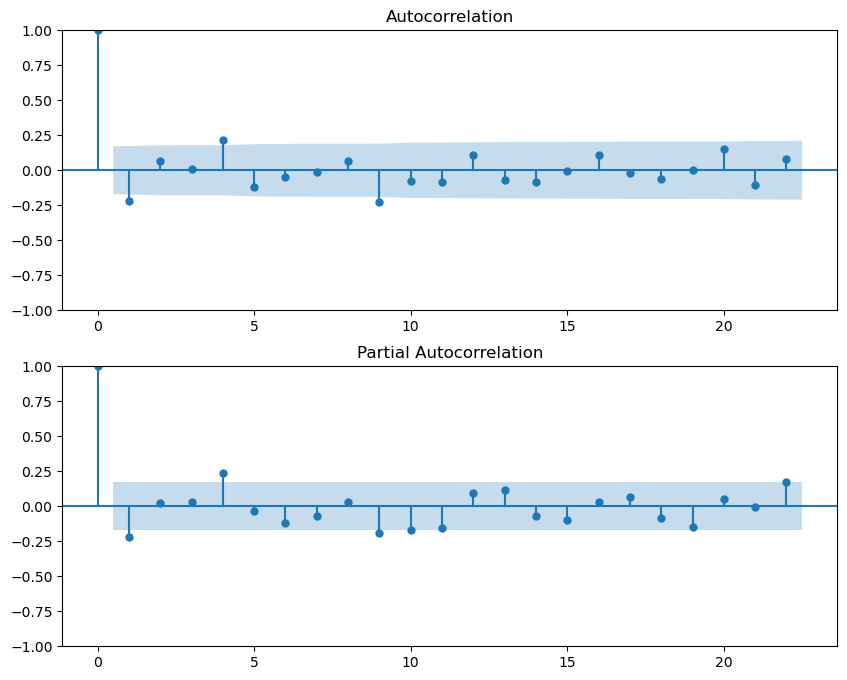

In [139]:
#Plotting the acf and pacf plot

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(sales44_new['Weekly_Sales'], ax=ax[0],)
plot_pacf(sales44_new['Weekly_Sales'], ax=ax[1],)
plt.show()

In [140]:
#model splitting the train and test data

train=sales44_new.iloc[:106]['Weekly_Sales']
test=sales44_new.iloc[107:]['Weekly_Sales']

In [141]:
#ARIMA MODEL
#the value of p=2,d=0,q=1 we took the data from the above acf and pacf plot.

model = ARIMA(train, order=(2, 0, 1))  #p=2,d=0,q=1 from the above acf and pacf plot
model_fit = model.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [142]:
model_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

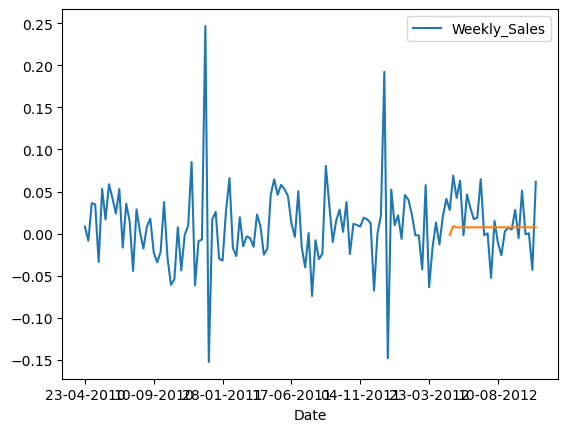

In [143]:
#See the forcast of ARIMA MODEL

forecast = model_fit.forecast(steps=26)
sales44_new.plot()
forecast.plot()

### In ARIMA model the forecast not performing well so did SARIMAX MODEL

In [144]:
#SARIMAX MODEL

model1 = SARIMAX(train, order=(2, 0, 1),seasonal_order=(2,0,1,26))  #p=2,d=0,q=1 from the above acf and pacf plot
model1_fit = model1.fit()

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently pars

In [145]:
model1_fit

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

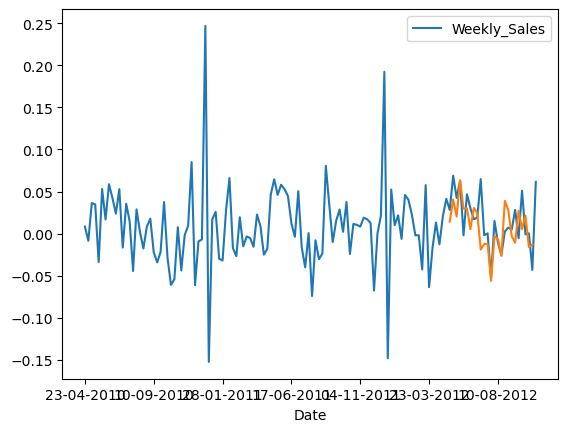

In [146]:
#See the forcast of SARIMAX MODEL

forecast = model1_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)  
sales44_new.plot()
forecast.plot()

### Forecast of weekly sale for next 12 weeks for store 44 

C:\Users\Vijay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

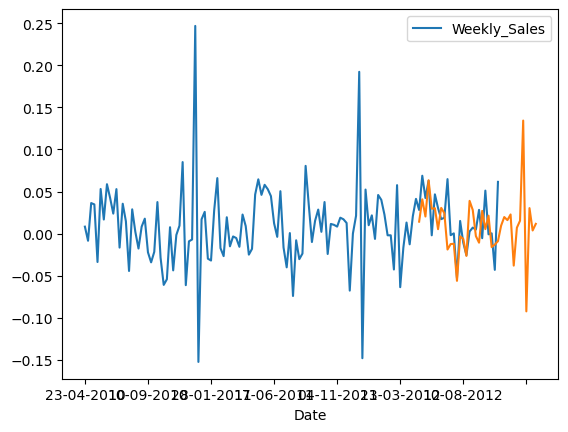

In [147]:
# Forcast of next 12 weeks data of store 44

forecast = model1_fit.forecast(steps=26+12)  # Forecasting for the next 12 periods
sales44_new.plot()
forecast.plot()